# Comparing Sequence Diversity Across Codes

**Questions to ask are:**

**1. How many samples did each site sequence over time?**

**2. Did sites that sequenced more samples capture more sequence diversity than sites that sequenced less?**

For this notebook, I sometimes referred to the four-letter code found after 'England' in the sequence name (eg. 'ALDP') as a "sequencing site" or a "sequencing centre", but this isn't true (ie. 'ARCH' is the REACT study, not a place)!  I've changed it to "code" in most visible places but have missed a few here and there.

I will analyze the COG-UK metadata file, here `cog_global_2022-03-28_public.csv.xz`.

**Load libraries**

In [1]:
library(phangorn)
library(ggtreeExtra)
library(ggtree)
library(ggnewscale)
library(colorspace);
library(RColorBrewer);
library(dplyr)
library(tidyr)
library(ggplot2)
library (ggpubr)
library (stringr)
library(castor)
library(lubridate)

Loading required package: ape

code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_Fitch” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

ggtreeExtra v1.4.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtreeExtra in published research, please cite the paper:

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact visualization of richly annotated phylogenetic data. Molecular Biology and Evolution 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166



ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpb

**Load the data, subset to only English samples, and add helpful columns**

Try doing the same thing from scratch in R, and then making a bar plot.

In [2]:
cog_meta <- "/home/madeline/Desktop/git_temp/QIB_Internship/data/cog_global_2022-04-18_public.csv.xz"
df <- read.csv(cog_meta)

Take only samples sequenced in England:

In [3]:
england <- df[grep("England", df$sequence_name), ]

Make a new column, `date2`, that puts the samples into 2-week bins:

In [4]:
england <- england %>% mutate(sample_date=as.POSIXct(sample_date))
england$date2 <- as.Date(cut(england$sample_date, breaks = "2 weeks", start.on.monday = FALSE))

Also convert `sample_date` to datetime:

In [5]:
england$sample_date <- as.Date(england$sample_date)

Make a column called `sequencing_centre` that shows only the first 4 digits of the central sample ID:

In [6]:
england$sequencing_centre = substr(england$central_sample_id,1,4)

See what you've done:

In [7]:
head(england)

,sequence_name,is_uk,is_cog_uk,central_sample_id,secondary_identifier,sample_date,epi_week,country,adm1,is_surveillance,is_travel_history,travel_history,lineage,uk_lineage,del_lineage,phylotype,date2,sequencing_centre
,<chr>,<chr>,<chr>,<chr>,<lgl>,<date>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
1,England/PHEC-YYRSOHG/2022,Y,Y,PHEC-YYRSOHG,NA,2022-04-09,120,UK,UK-ENG,N,NA,,BA.2.10,UK25642,del_trans_22962,UK25642_1.88.2.1.1.1,2022-04-03,PHEC
2,England/PHEC-YYRS18X/2022,Y,Y,PHEC-YYRS18X,NA,2022-04-09,120,UK,UK-ENG,N,NA,,BA.2,UK38140,del_trans_132173,UK38140_1,2022-04-03,PHEC
3,England/PHEC-YYRST13/2022,Y,Y,PHEC-YYRST13,NA,2022-04-09,120,UK,UK-ENG,N,NA,,BA.2.10.1,UK38217,del_trans_140177,UK38217_1.2.2,2022-04-03,PHEC
4,England/PHEC-YYRSXKC/2022,Y,Y,PHEC-YYRSXKC,NA,2022-04-07,119,UK,UK-ENG,N,NA,,BA.2,UK38063,del_trans_114965,UK38063_1.57,2022-04-03,PHEC
5,England/PHEC-YYRSWGX/2022,Y,Y,PHEC-YYRSWGX,NA,2022-04-11,120,UK,UK-ENG,N,NA,,BA.2.9,UK26836,del_trans_52727,UK26836_1.16.2,2022-04-03,PHEC
6,England/PHEC-YYRSOKM/2022,Y,Y,PHEC-YYRSOKM,NA,2022-04-06,119,UK,UK-ENG,N,NA,,BA.2,UK38096,del_trans_125581,UK38096_1.1.1,2022-04-03,PHEC


# Relative sequencing contributions from each site over time

What proportion of the nationwide SARS-CoV-2 samples were sequenced by each site, at 2-week granularity?

Warning message:
“Removed 195439 rows containing non-finite values (stat_count).”


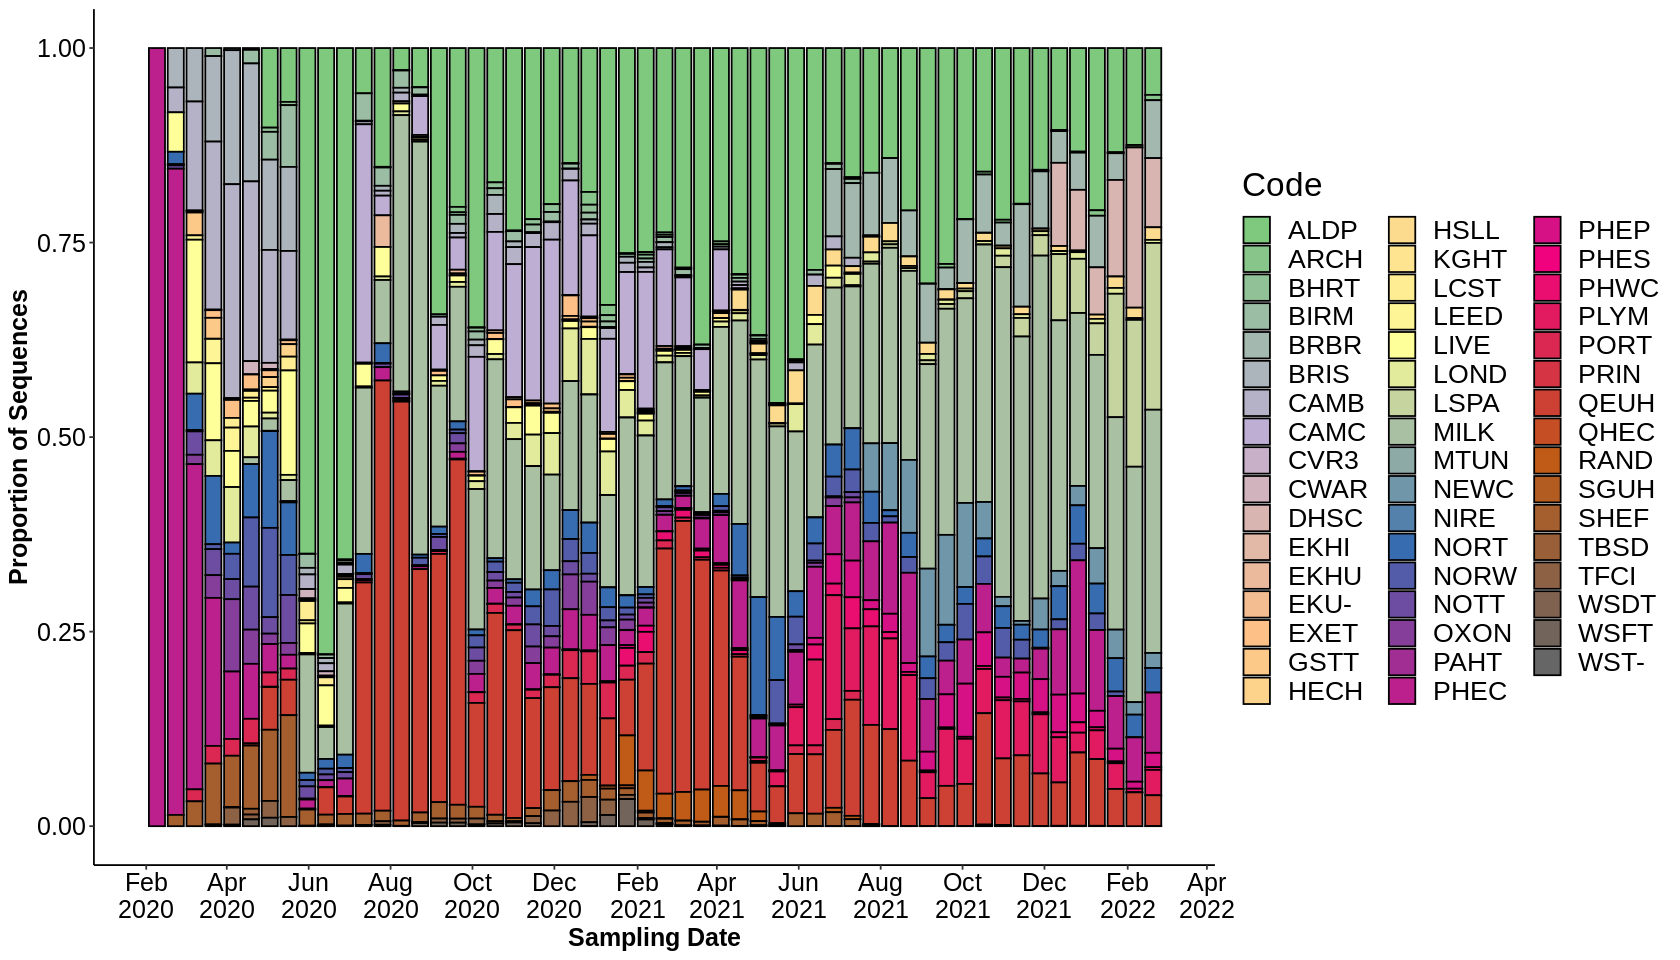

In [8]:
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
getPal_centre  = colorRampPalette(brewer.pal(8,"Accent"))(length(unique(england$sequencing_centre)))

p <- ggplot(data=england, mapping = aes(x = date2, fill=sequencing_centre))+ ggplot2::geom_bar(position='fill', width=12,color='black')  ## geom_bar()
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Code")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Proportion of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c('2020-01-31','2022-02-28')))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )
p

#ggsave(file="sequencing_centres_proportion.pdf", plot=p, width=14, height=8)

Now display the same thing but counts, not proportions:

Warning message:
“Removed 195439 rows containing non-finite values (stat_count).”


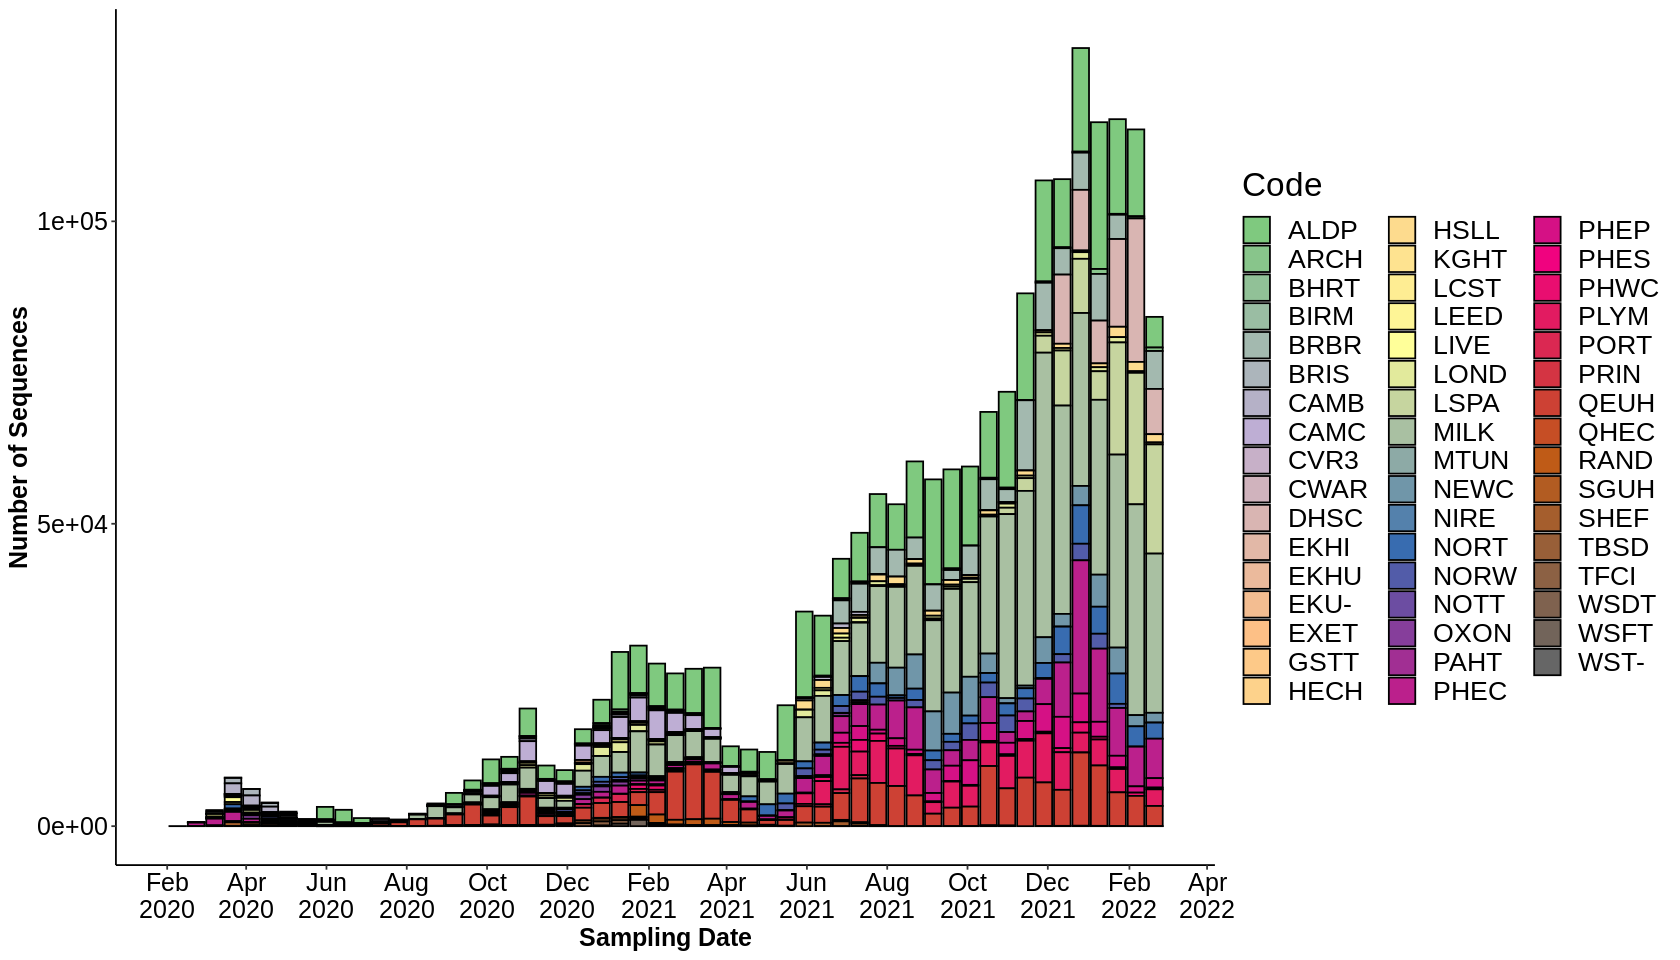

In [9]:
p <- ggplot(england, aes(x = date2, fill=sequencing_centre))
p <- p  + geom_bar(color='black')
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Code")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Number of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c('2020-01-31','2022-02-28')))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )
p
#ggsave(file="sequencing_centres_counts.pdf", plot=p, width=14, height=8)

# Total number of sequences per code

View the centres and the total number of sequences associated with each numerically:

In [10]:
total_counts <- as.data.frame(table(england$sequencing_centre))

In [11]:
total_counts

Var1,Freq
<fct>,<int>
ALDP,380531
ARCH,7707
BHRT,1237
BIRM,3559
BRBR,103705
BRIS,4613
CAMB,10708
CAMC,36103
CVR3,1


Plot this as a bar graph, showing how many sequences overall come from each centre:

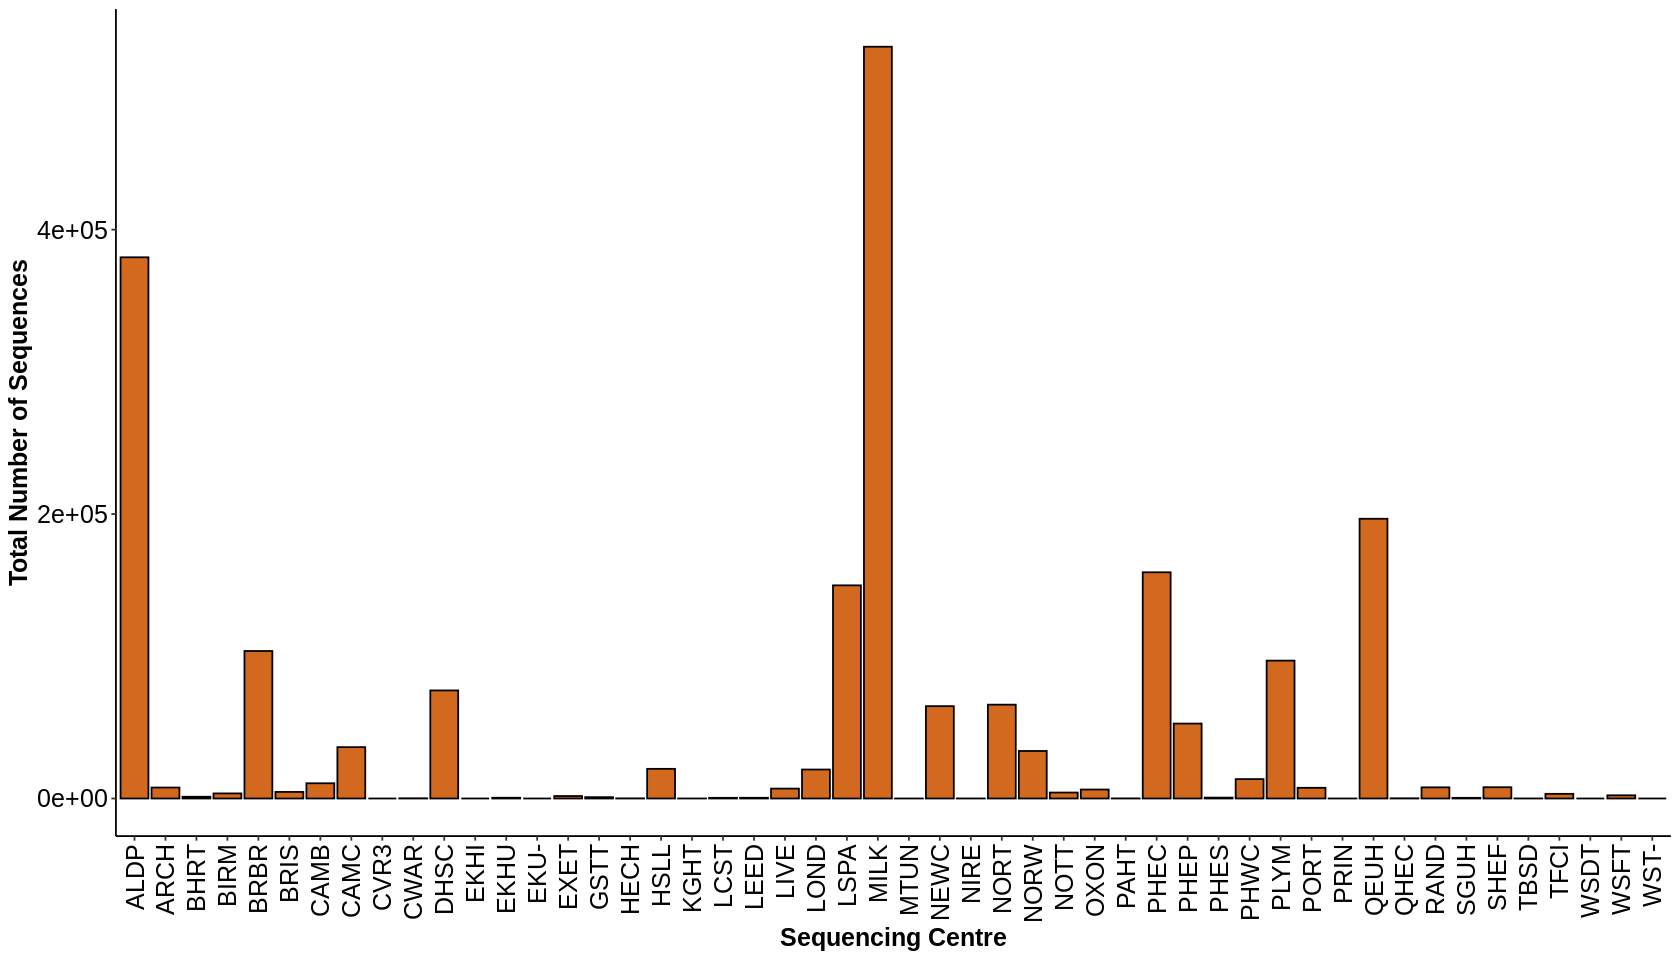

In [12]:
p <- ggplot(data=total_counts, mapping = aes(x = Var1, y = Freq)) + ggplot2::geom_bar(stat="identity", color='black', fill='chocolate')  ## geom_bar()
#p <- p + scale_y_log10() 
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Var1")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sequencing Centre") + ylab("Total Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p

NORW, LSPA, CAMC, PHEP and PHES have similar sequencing contributions overall.

Plot the same thing on a log scale to make the differences easier to see:

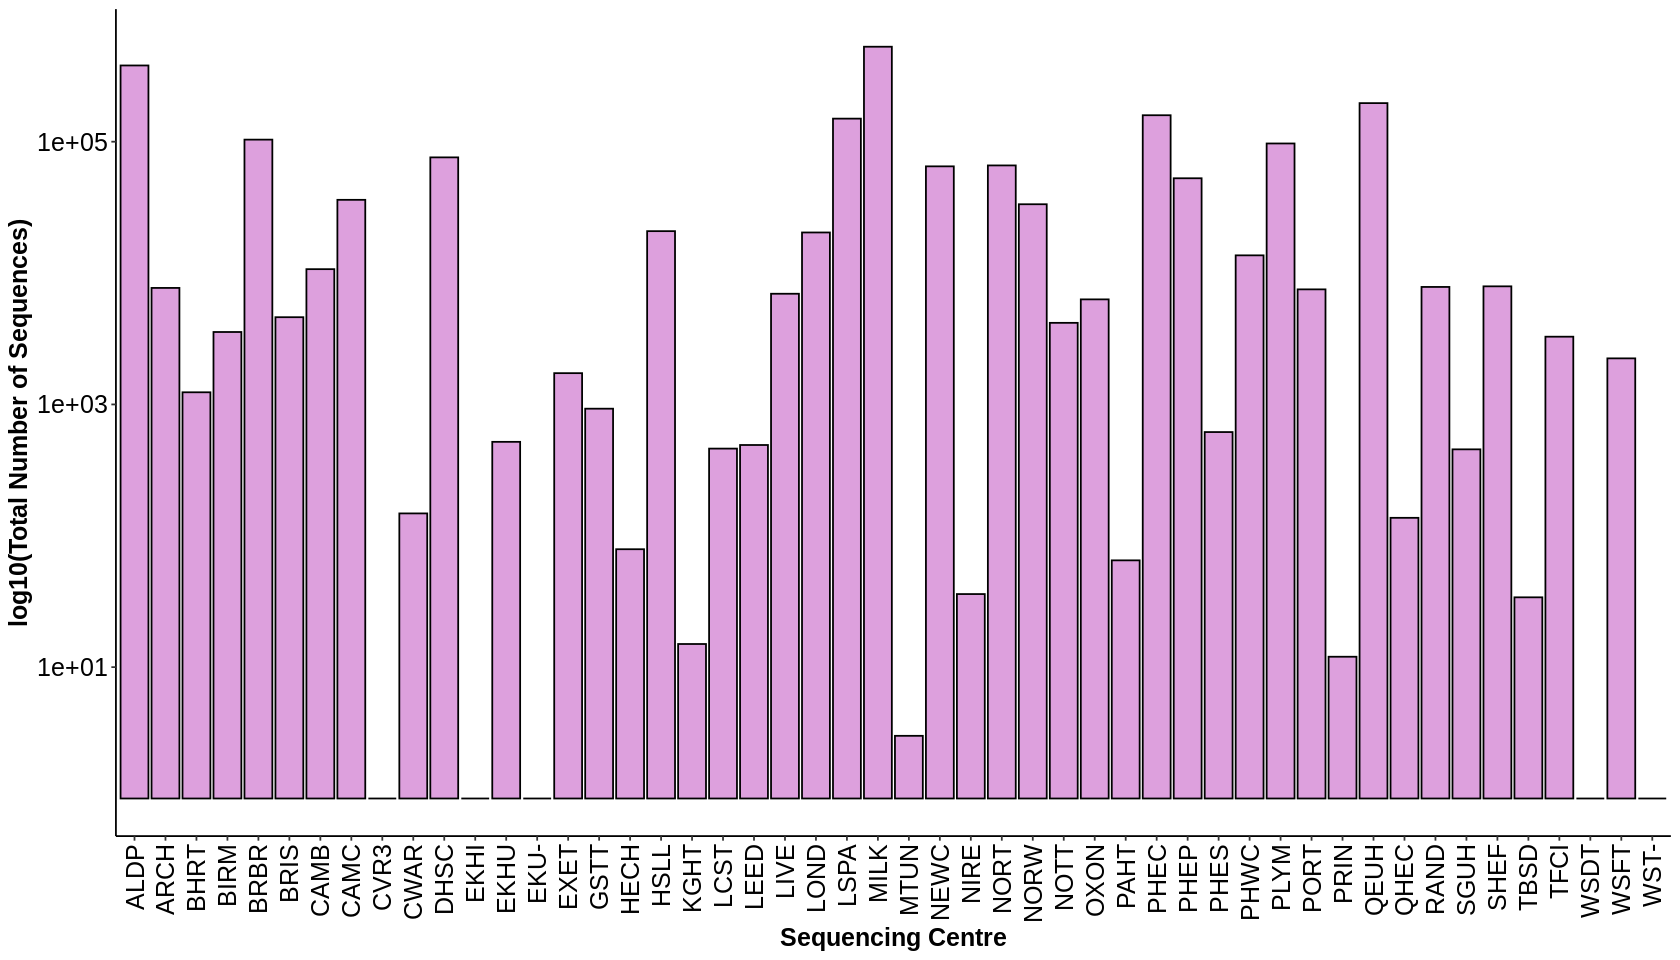

In [13]:
p <- ggplot(data=total_counts, mapping = aes(x = Var1, y = Freq)) + ggplot2::geom_bar(stat="identity", color='black', fill='plum')  ## geom_bar()
p <- p + scale_y_log10() 
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Var1")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sequencing Centre") + ylab("log10(Total Number of Sequences)")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p

# Restrict to centres with >=100 sequences over all time 

It can be seen from the above plots that some of sequencing centres have very few samples.  Some of these are likely typos.  To clean up, remove all the sequencing centres that have 100 sequences or less throughout the whole dataset.

List the centres to remove:

In [14]:
centres_to_remove <- total_counts[ which(total_counts$Freq < 100),]
centres_to_remove_ls <- centres_to_remove[['Var1']]
centres_to_remove_ls

[1] CVR3 EKHI EKU- HECH KGHT MTUN NIRE PAHT PRIN TBSD WSDT WST-
50 Levels: ALDP ARCH BHRT BIRM BRBR BRIS CAMB CAMC CVR3 CWAR DHSC EKHI ... WST-

Yes--looks like a few of these (eg. EKHI, EKU) could be typos.  

Print the list of the centres to keep and their sequence counts, to check:

In [15]:
#total_counts[ which(total_counts$Freq >= 100),]

Cut out all the centres to remove and call the cleaned dataframe `england_thresh`.

In [16]:
england_thresh <- england[ ! england$sequencing_centre %in% centres_to_remove_ls, ]

In [17]:
head(england_thresh)

,sequence_name,is_uk,is_cog_uk,central_sample_id,secondary_identifier,sample_date,epi_week,country,adm1,is_surveillance,is_travel_history,travel_history,lineage,uk_lineage,del_lineage,phylotype,date2,sequencing_centre
,<chr>,<chr>,<chr>,<chr>,<lgl>,<date>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
1,England/PHEC-YYRSOHG/2022,Y,Y,PHEC-YYRSOHG,NA,2022-04-09,120,UK,UK-ENG,N,NA,,BA.2.10,UK25642,del_trans_22962,UK25642_1.88.2.1.1.1,2022-04-03,PHEC
2,England/PHEC-YYRS18X/2022,Y,Y,PHEC-YYRS18X,NA,2022-04-09,120,UK,UK-ENG,N,NA,,BA.2,UK38140,del_trans_132173,UK38140_1,2022-04-03,PHEC
3,England/PHEC-YYRST13/2022,Y,Y,PHEC-YYRST13,NA,2022-04-09,120,UK,UK-ENG,N,NA,,BA.2.10.1,UK38217,del_trans_140177,UK38217_1.2.2,2022-04-03,PHEC
4,England/PHEC-YYRSXKC/2022,Y,Y,PHEC-YYRSXKC,NA,2022-04-07,119,UK,UK-ENG,N,NA,,BA.2,UK38063,del_trans_114965,UK38063_1.57,2022-04-03,PHEC
5,England/PHEC-YYRSWGX/2022,Y,Y,PHEC-YYRSWGX,NA,2022-04-11,120,UK,UK-ENG,N,NA,,BA.2.9,UK26836,del_trans_52727,UK26836_1.16.2,2022-04-03,PHEC
6,England/PHEC-YYRSOKM/2022,Y,Y,PHEC-YYRSOKM,NA,2022-04-06,119,UK,UK-ENG,N,NA,,BA.2,UK38096,del_trans_125581,UK38096_1.1.1,2022-04-03,PHEC


Now, plot the sequencing contributions over time as before, only with the clean data:

Warning message:
“Removed 195437 rows containing non-finite values (stat_count).”


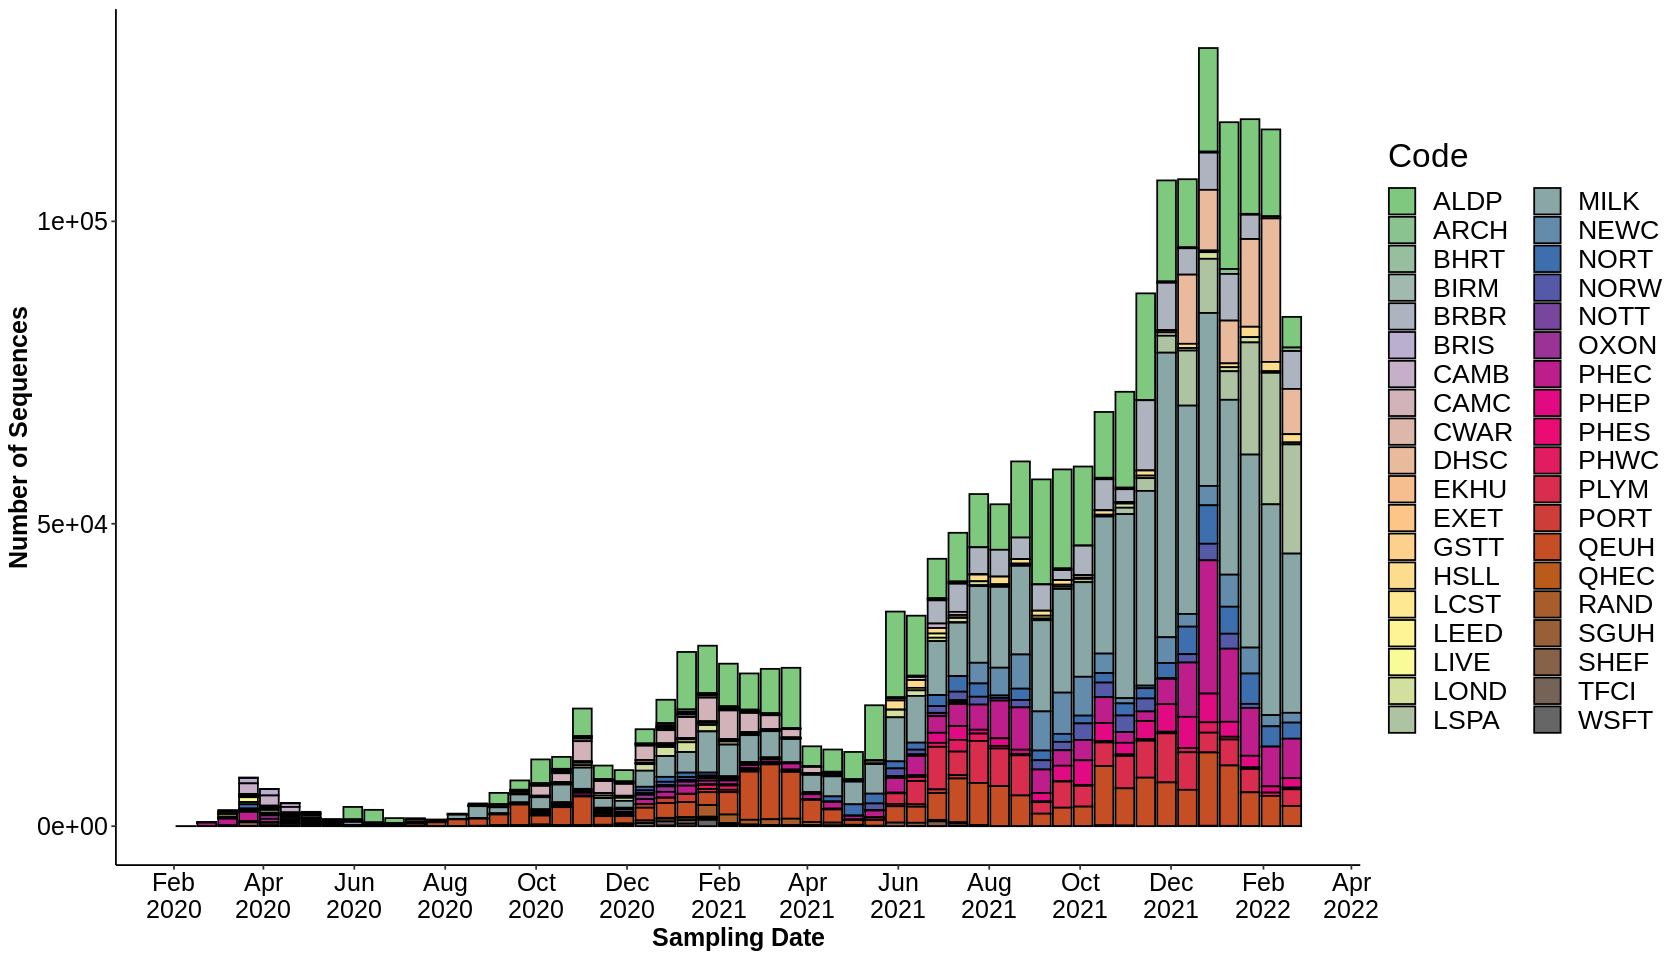

In [18]:
options(repr.plot.width=14, repr.plot.height=8) ; par(oma=c(0,0,0,0))
getPal_centre  = colorRampPalette(brewer.pal(8,"Accent"))(length(unique(england_thresh$sequencing_centre)))


p <- ggplot(england_thresh, aes(x = date2, fill=sequencing_centre))
p <- p  + geom_bar(color='black')
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Code")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Number of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c('2020-01-31','2022-02-28')))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )
p
#ggsave(file="sequencing_centres_counts.pdf", plot=p, width=14, height=8)

Warning message:
“Removed 195437 rows containing non-finite values (stat_count).”


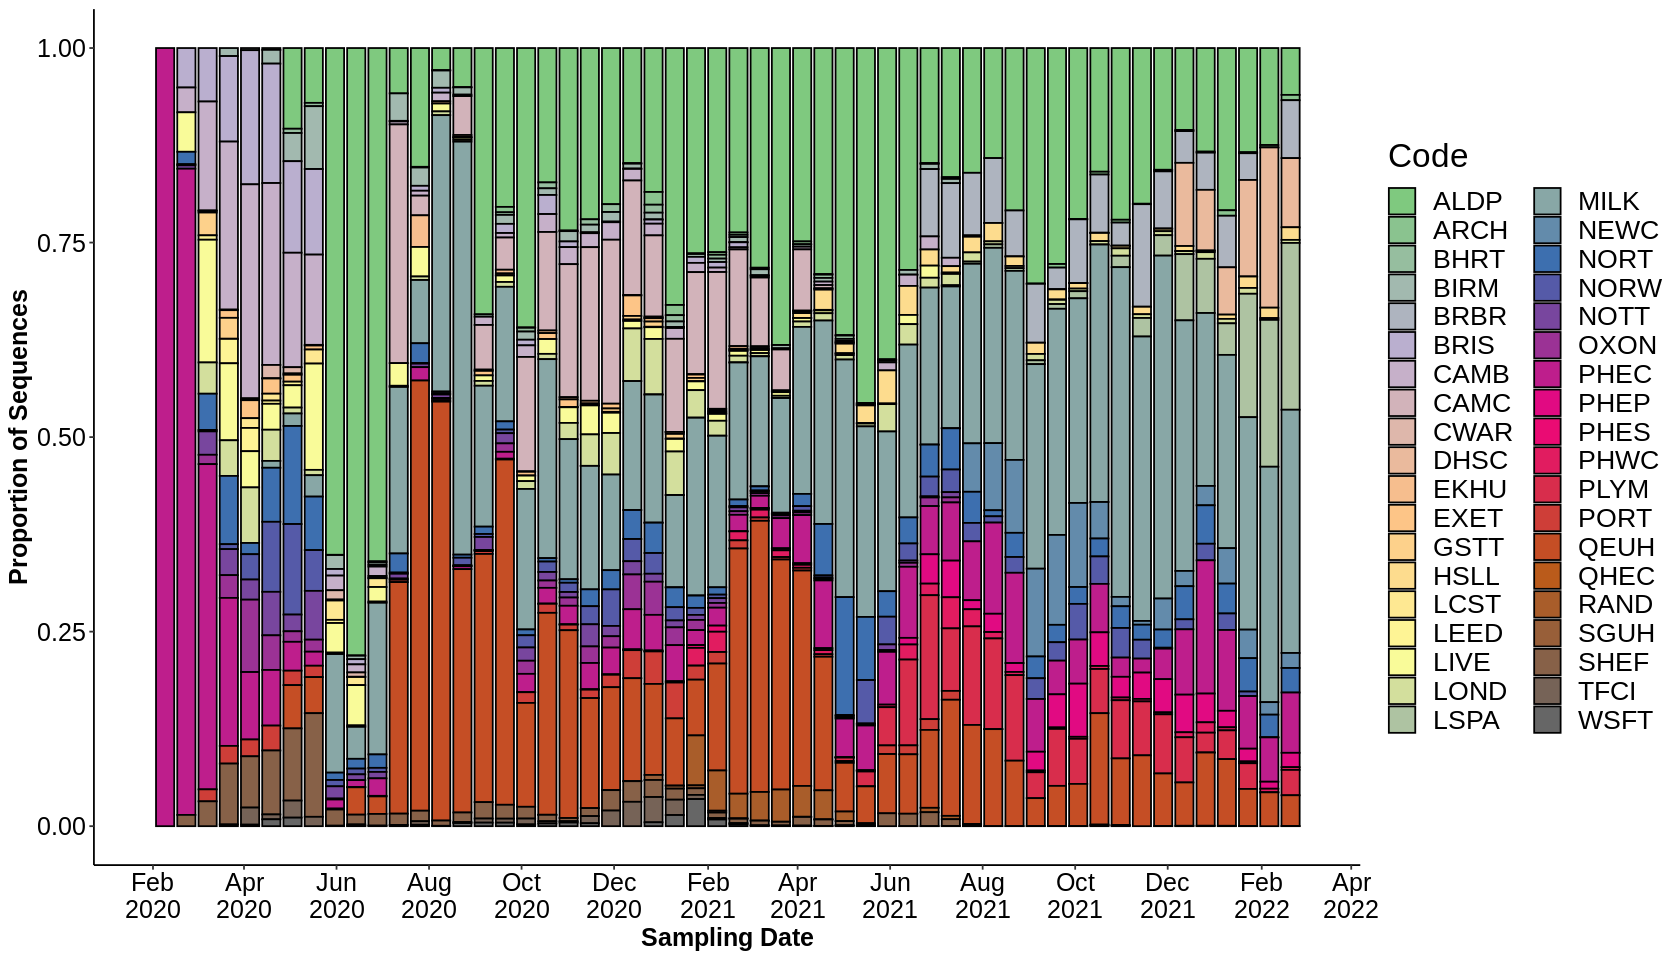

In [19]:
p <- ggplot(data=england_thresh, mapping = aes(x = date2, fill=sequencing_centre))+ ggplot2::geom_bar(position='fill', width=12,color='black')  ## geom_bar()
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Code")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Proportion of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c('2020-01-31','2022-02-28')))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )
p

**Takeaways from these plots are:**

* PHEC began the sequencing effort
* MILK has high sequencing rates all through the pandemic
* ALDP and QEUH are relatively high as well
* CAMB varied: some seasons were highly sampled (start of the pandemic), others almost nothing (later part)
* Sequencing numbers peaked overall in winter 2022, with Omicron

# Phylotypes at each centre

In [20]:
d <- england_thresh[(england_thresh$sequencing_centre == 'ALDP'),]

Count the unique values for lineage, uk_lineage, del_lineage, and phylotype:

In [21]:
length(unique(d$lineage))
length(unique(d$uk_lineage))
length(unique(d$del_lineage))
length(unique(d$phylotype))

[1] 539

[1] 16139

[1] 14826

[1] 76102

OK, there are still too many lineages to fit in a bar plot for some.  Maybe start out by making a bar graph counting the unique lineages per centre over all time.

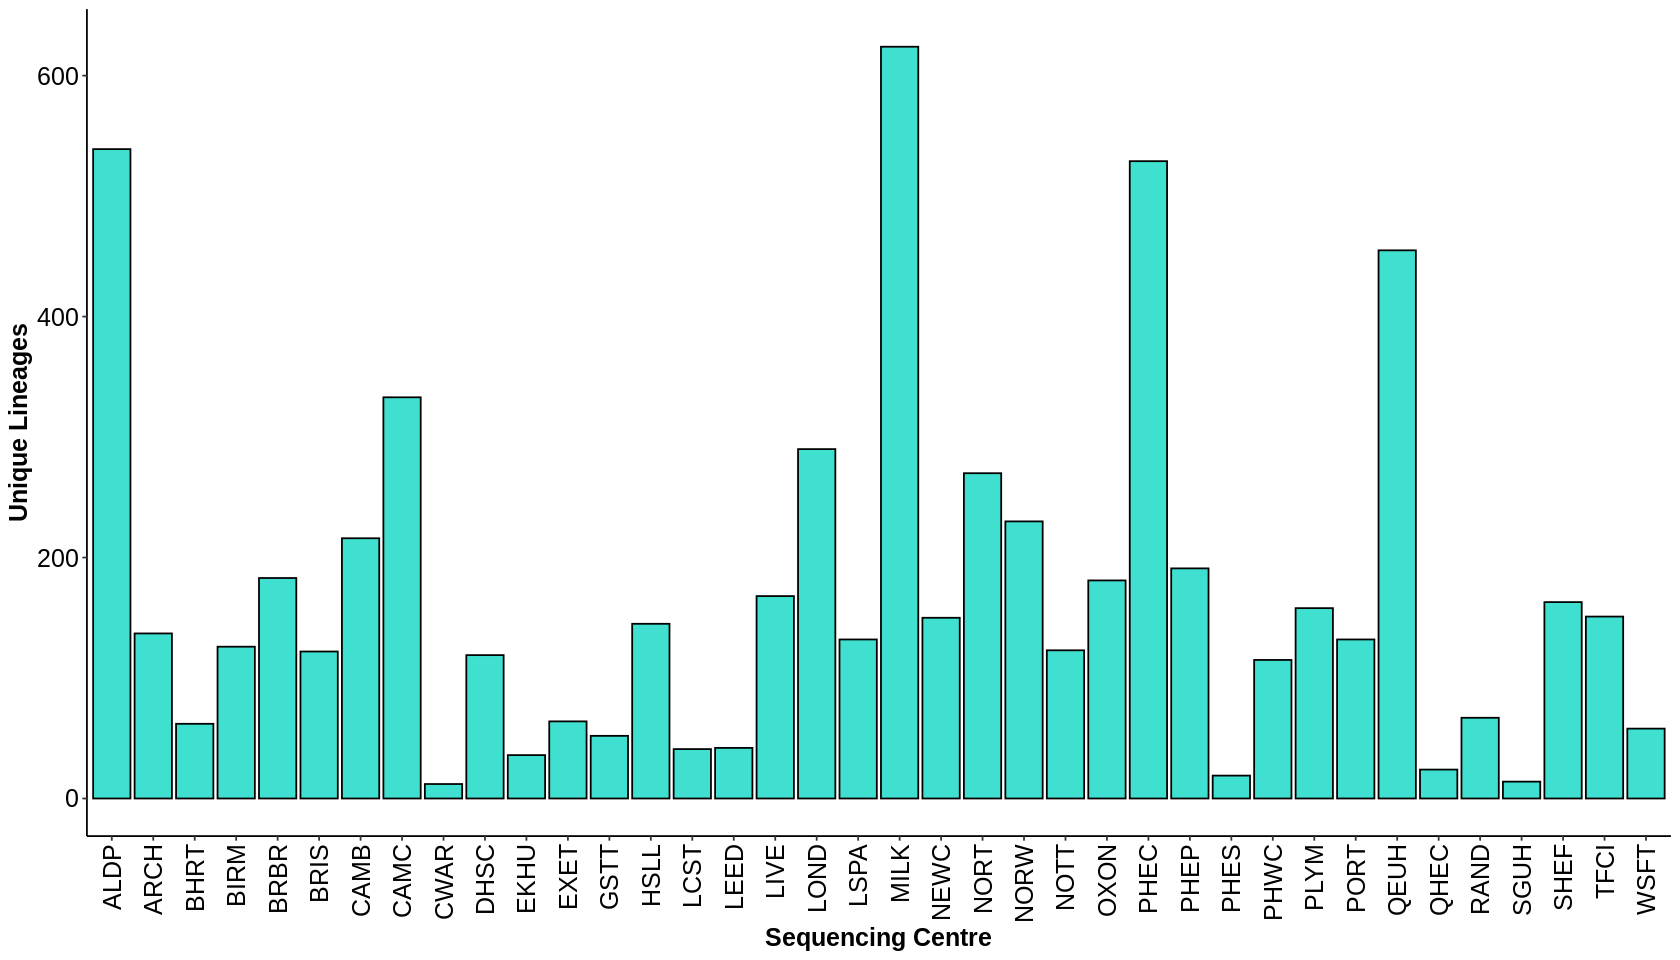

In [22]:
# lineage counts over all time

lineage_counts <- england_thresh %>%                             
  group_by(sequencing_centre) %>%
  summarise(count = n_distinct(lineage))

p <- ggplot(data=lineage_counts, mapping = aes(x = sequencing_centre, y = count)) + ggplot2::geom_bar(stat="identity", color='black', fill='turquoise')  ## geom_bar()
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sequencing Centre") + ylab("Unique Lineages")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p

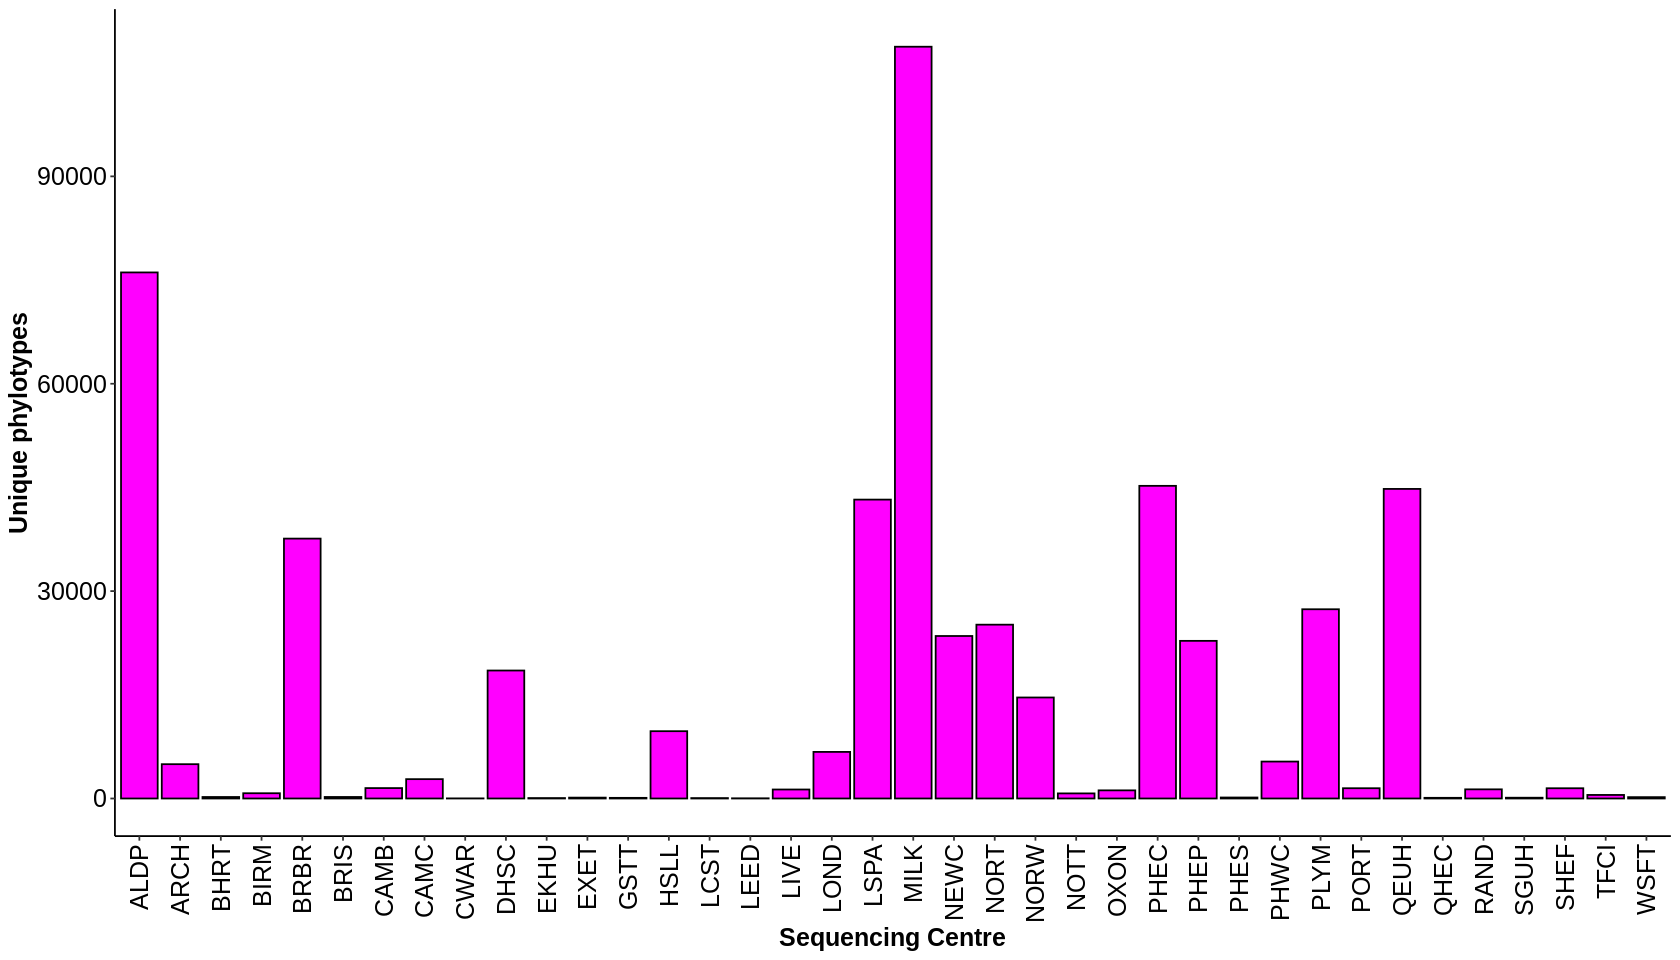

In [23]:
# phylotype counts over all time

phylotype_counts <- england_thresh %>%                             
  group_by(sequencing_centre) %>%
  summarise(count = n_distinct(phylotype))

p <- ggplot(data=phylotype_counts, mapping = aes(x = sequencing_centre, y = count)) + ggplot2::geom_bar(stat="identity", color='black', fill='magenta')  ## geom_bar()
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sequencing Centre") + ylab("Unique phylotypes")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p

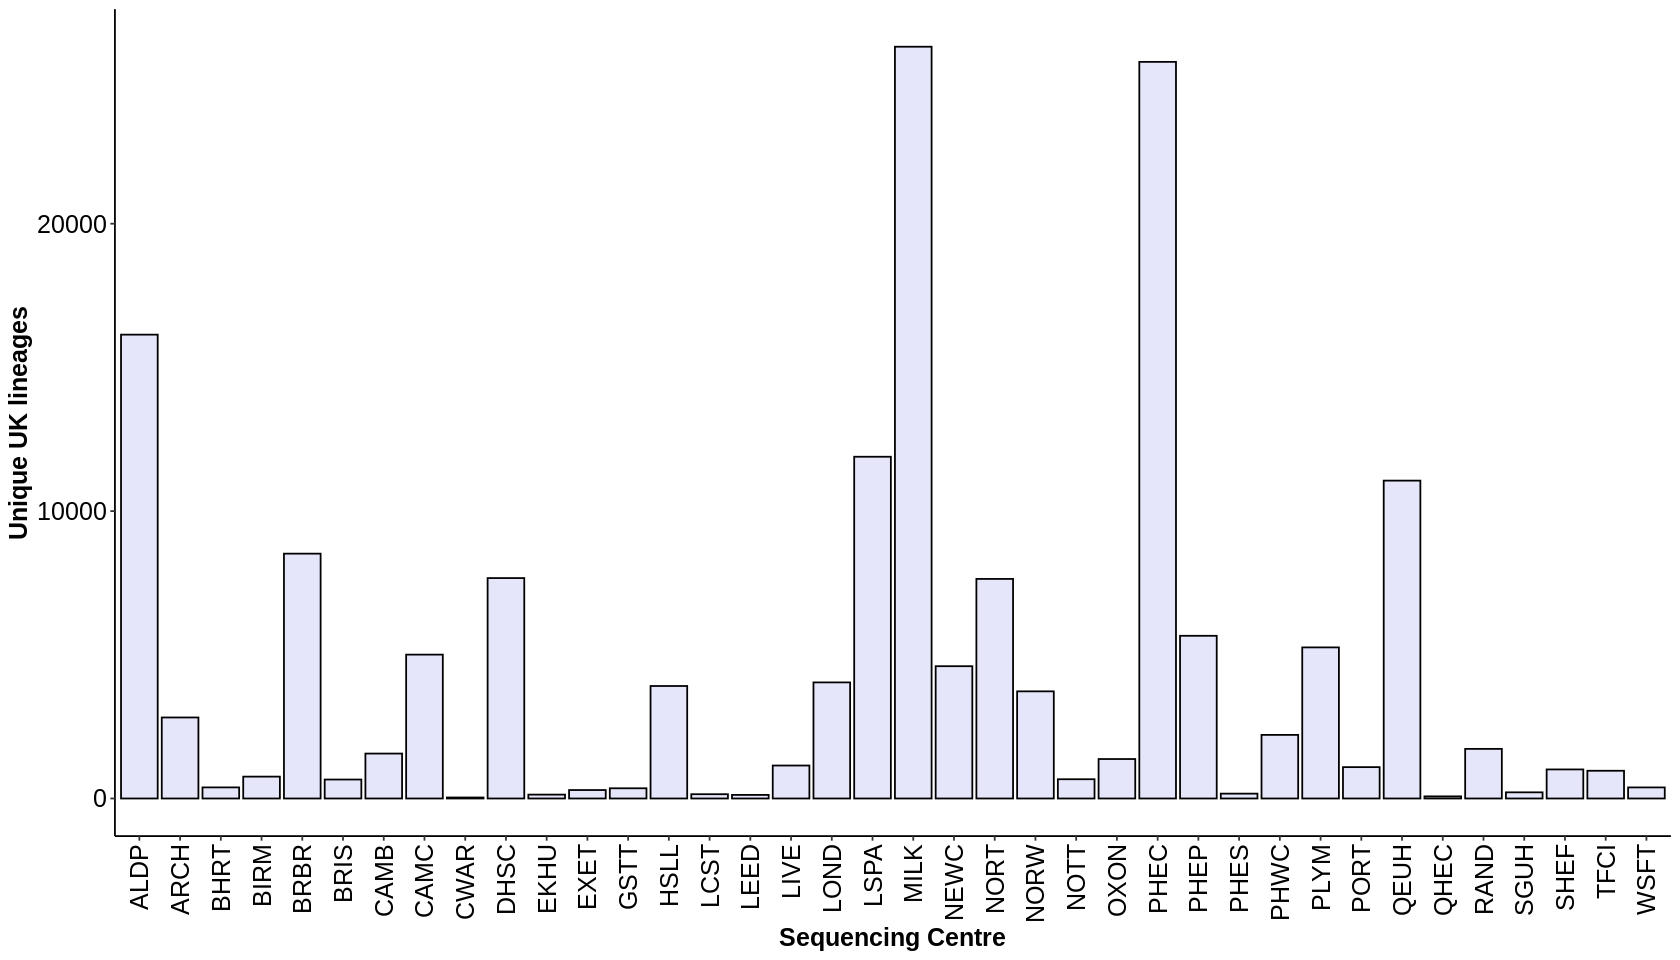

In [24]:
# uk_lineage counts over all time

uk_lineage_counts <- england_thresh %>%                             
  group_by(sequencing_centre) %>%
  summarise(count = n_distinct(uk_lineage))

p <- ggplot(data=uk_lineage_counts, mapping = aes(x = sequencing_centre, y = count)) + ggplot2::geom_bar(stat="identity", color='black', fill='lavender')  ## geom_bar()
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sequencing Centre") + ylab("Unique UK lineages")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p

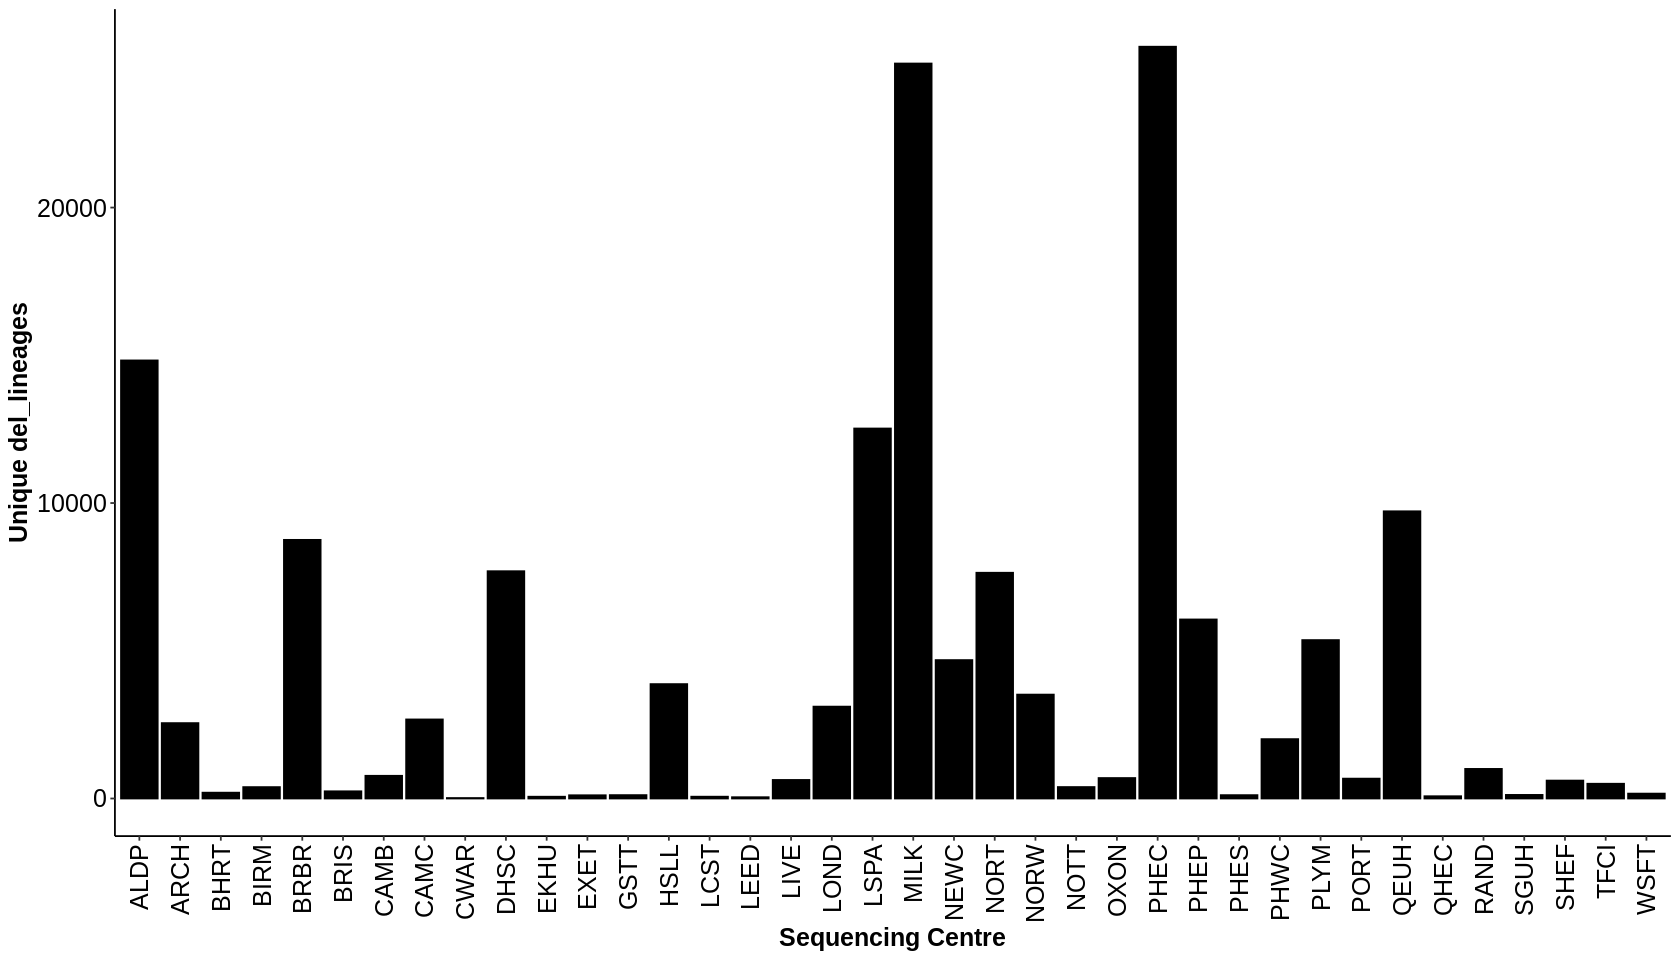

In [25]:
# del_lineage counts over all time

del_lineage_counts <- england_thresh %>%                             
  group_by(sequencing_centre) %>%
  summarise(count = n_distinct(del_lineage))

p <- ggplot(data=del_lineage_counts, mapping = aes(x = sequencing_centre, y = count)) + ggplot2::geom_bar(stat="identity", color='black', fill='black')  ## geom_bar()
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sequencing Centre") + ylab("Unique del_lineages")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p

# Plot unique lineages over time for individual centres

Maybe I could write a function to make generating these plots easier.  Let's see...

In [26]:
plot_lineages <- function(start_date, end_date, centre){

d <- subset(england_thresh, sequencing_centre == centre)
date_subset <- subset(d, (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now

total_lineages <- as.data.frame(table(date_subset$lineage))

p <- ggplot(data=total_lineages, mapping = aes(x = Var1, y = Freq)) + ggplot2::geom_bar(stat="identity", color='black', fill='maroon')
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Lineage") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

I'm interested in comparing diversity between NORW and CAMB, because they have about the same number of unique lineages over all time (if I got R right), but England/NORW has ~3x as many sequences as England/CAMB.  Then again they are right next to each other, so comparing them might not be that interesting.  Also NORT, which has about the same # lineages as CAMB, but 5x the sequences.  All three are university towns of similar population size.  Do they each show a similar distribution across lineages over time?

**April 1, 2022 note:** CAMB has the same number of unique lineages over all time because it sequences a lot and stops sequencing quite early in the pandemic.  So, don't compare CAMB over all time!

**December 2021**

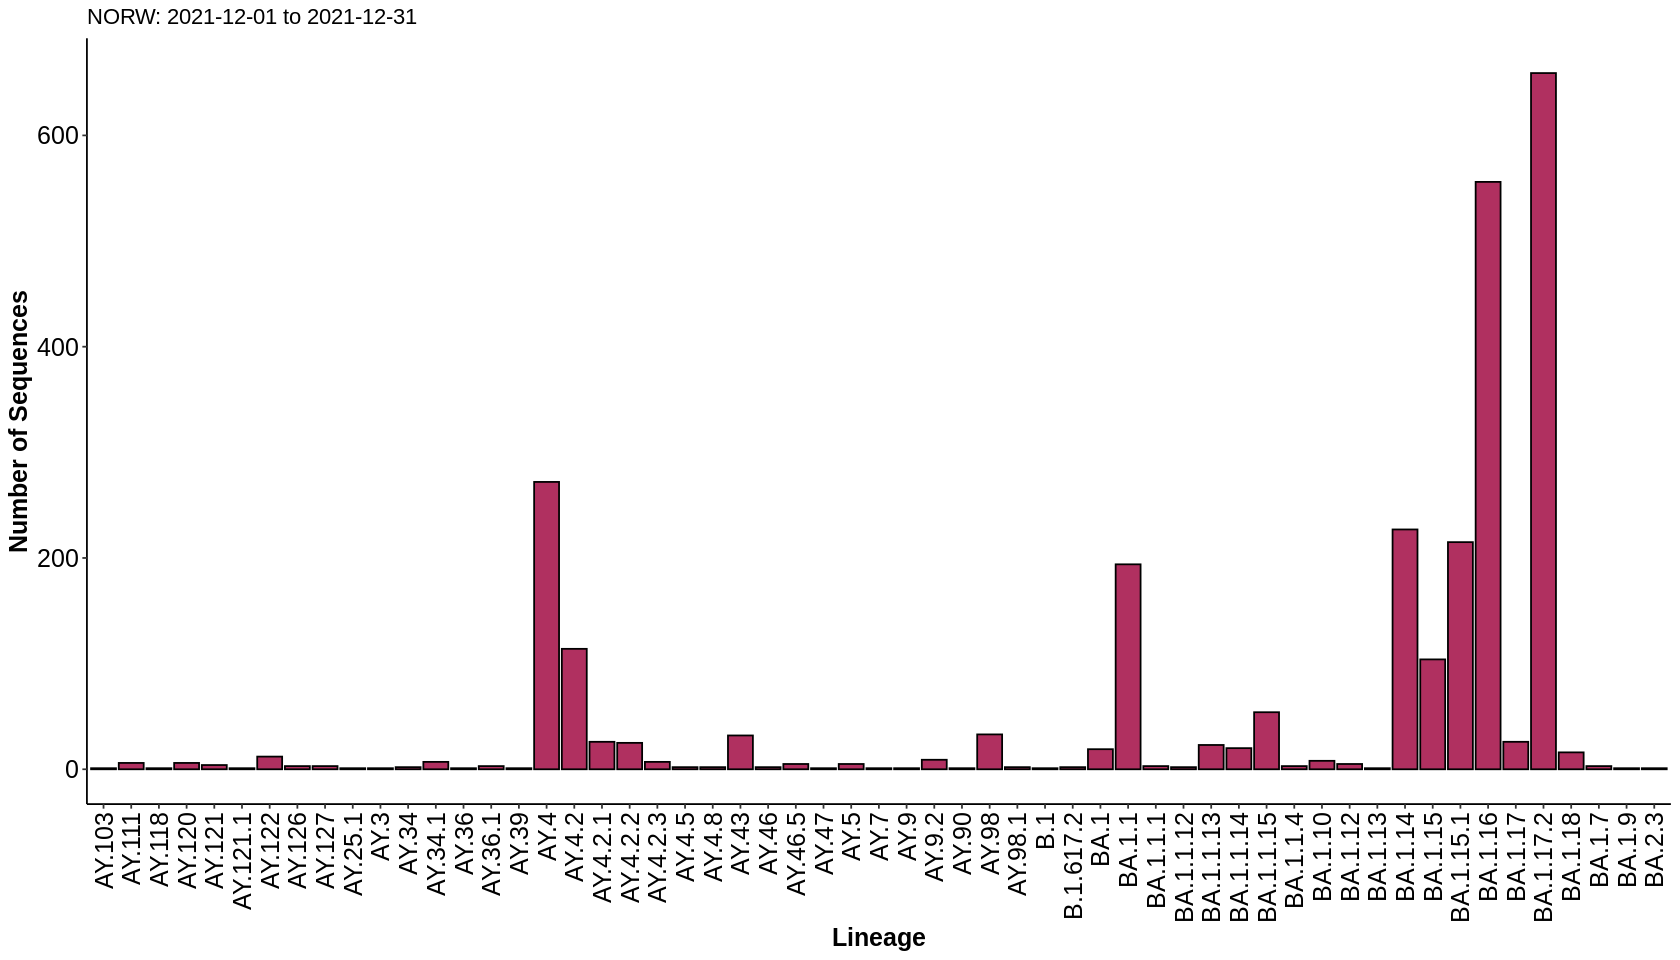

In [27]:
plot_lineages("2021-12-01","2021-12-31","NORW")

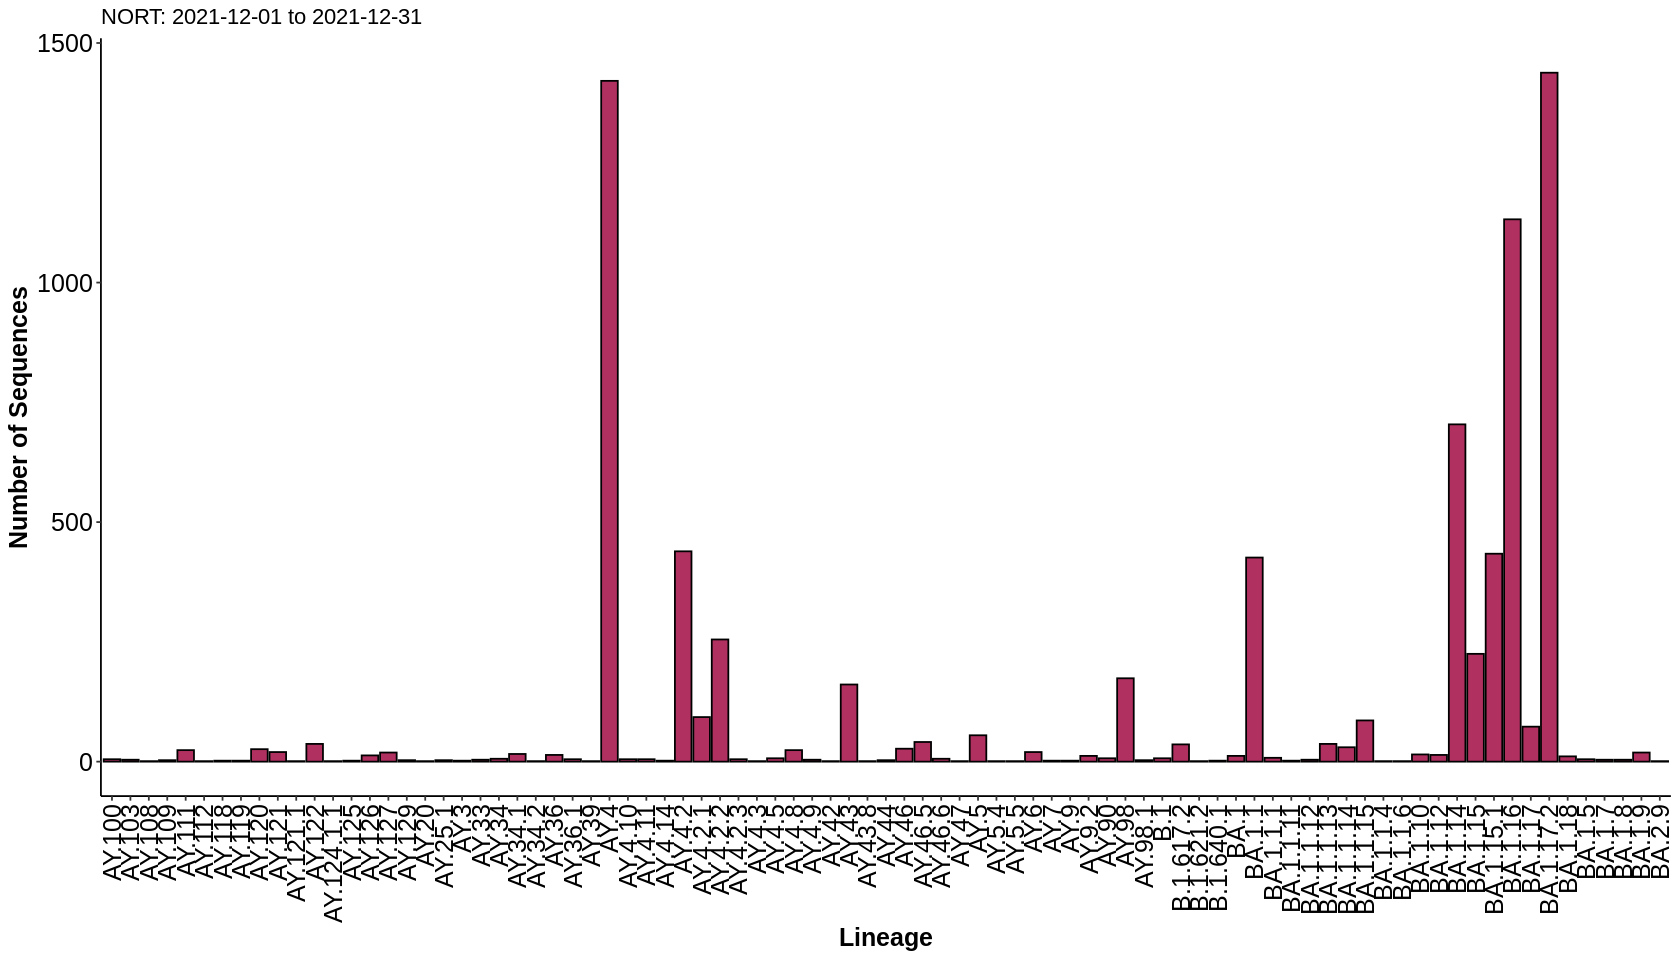

In [28]:
plot_lineages("2021-12-01","2021-12-31","NORT")

So, the scales are different, but the shapes are about the same for the major lineages.  Probably, this is because of the **high transmissibility** of Omicron and Delta, that would have spread very quickly from place to place, leaving small chances of one site having a unique lineage set.  However, note that BA.2 was sequenced in NORT but not in NORW, showing that it was present there in December 2021.  Also note that **NORT has many lineages that NORW doesn't capture**, all sequenced at comparatively very low rates.

**December 1, 2021 to February 28, 2022**

Next, what was circulating in NORW from December 1, 2021 to February 28, 2022 (the same timeframe that my Norfolk tree covers)?

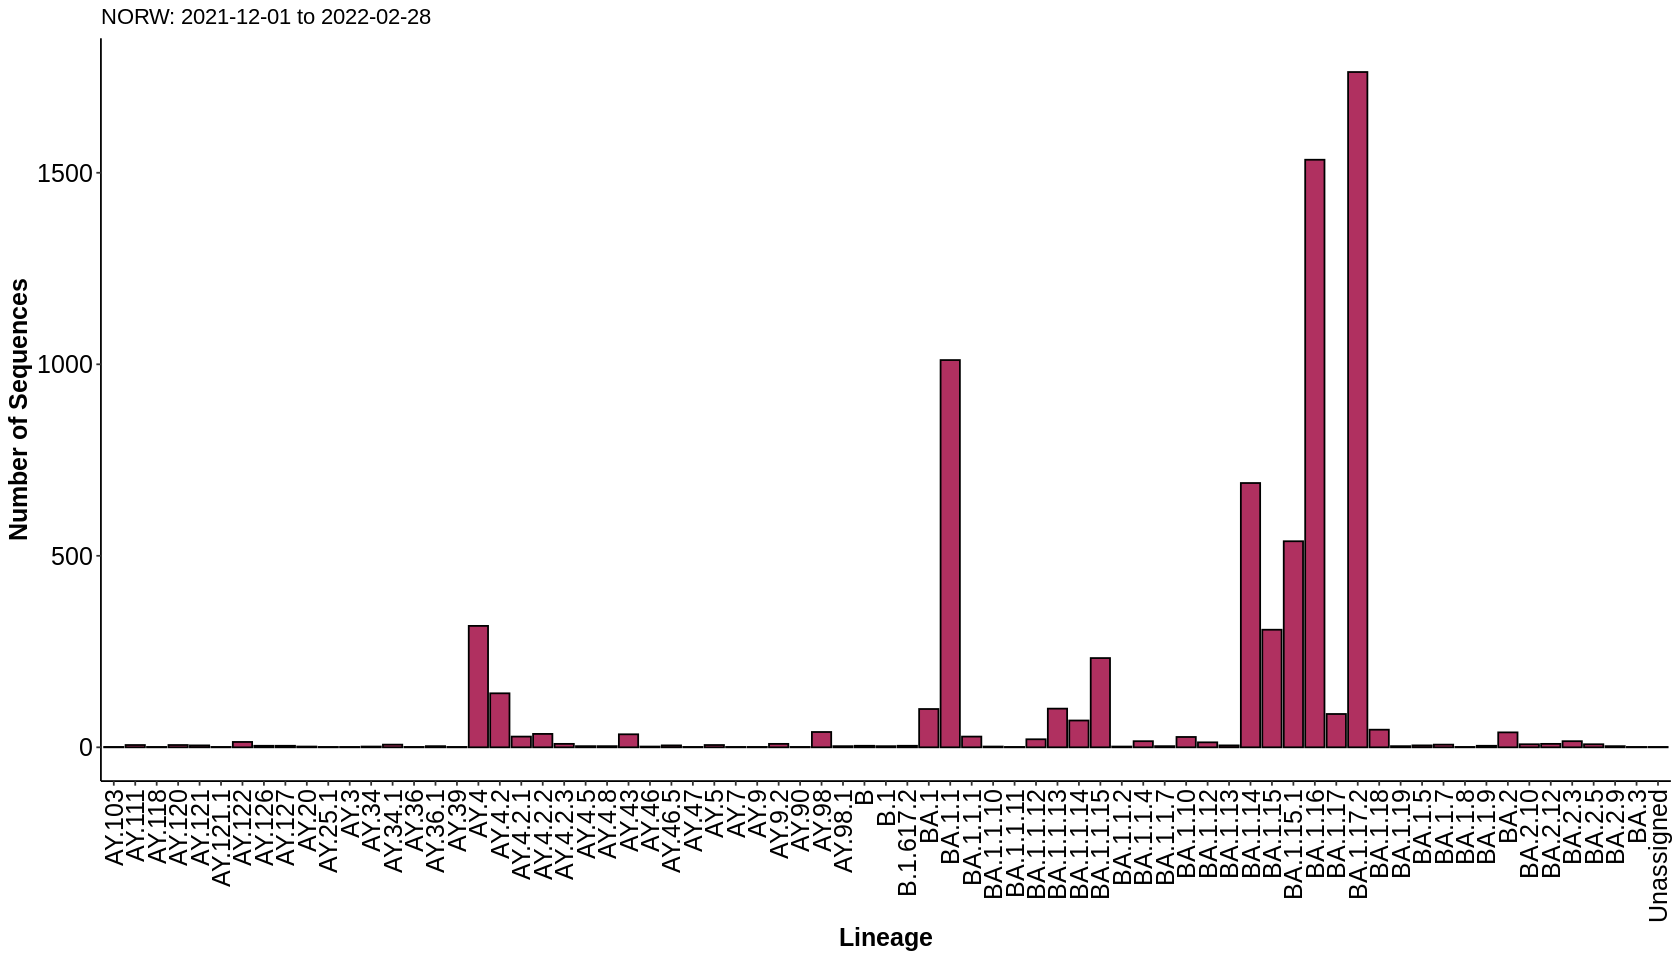

In [29]:
plot_lineages("2021-12-01","2022-02-28","NORW")

By far mostly Omicron, and a few Delta sequences.  BA.2 and BA.3 have shown up in NORW in 2022.

# Plot unique lineages over time for multiple centres at once

Same data, but stacked bar plots so it's easier to compare across codes.

In [30]:
plot_lineages_choose_sites <- function(start_date, end_date, centres){

date_subset <- subset(england, (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
centre_subs2 <- filter(date_subset, grepl(paste(centres, collapse="|"), sequencing_centre))

p <- ggplot(centre_subs2, aes(x = lineage, fill=sequencing_centre)) + geom_bar(color='black')
p <- p + scale_x_discrete(expand=c(0.0001, 0))
p <- p + scale_fill_discrete(name = "Sequencing Site")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Lineage") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=12, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(start_date, " to ", end_date))
p
}

Comparing NORW and NORT in December 2021 again:

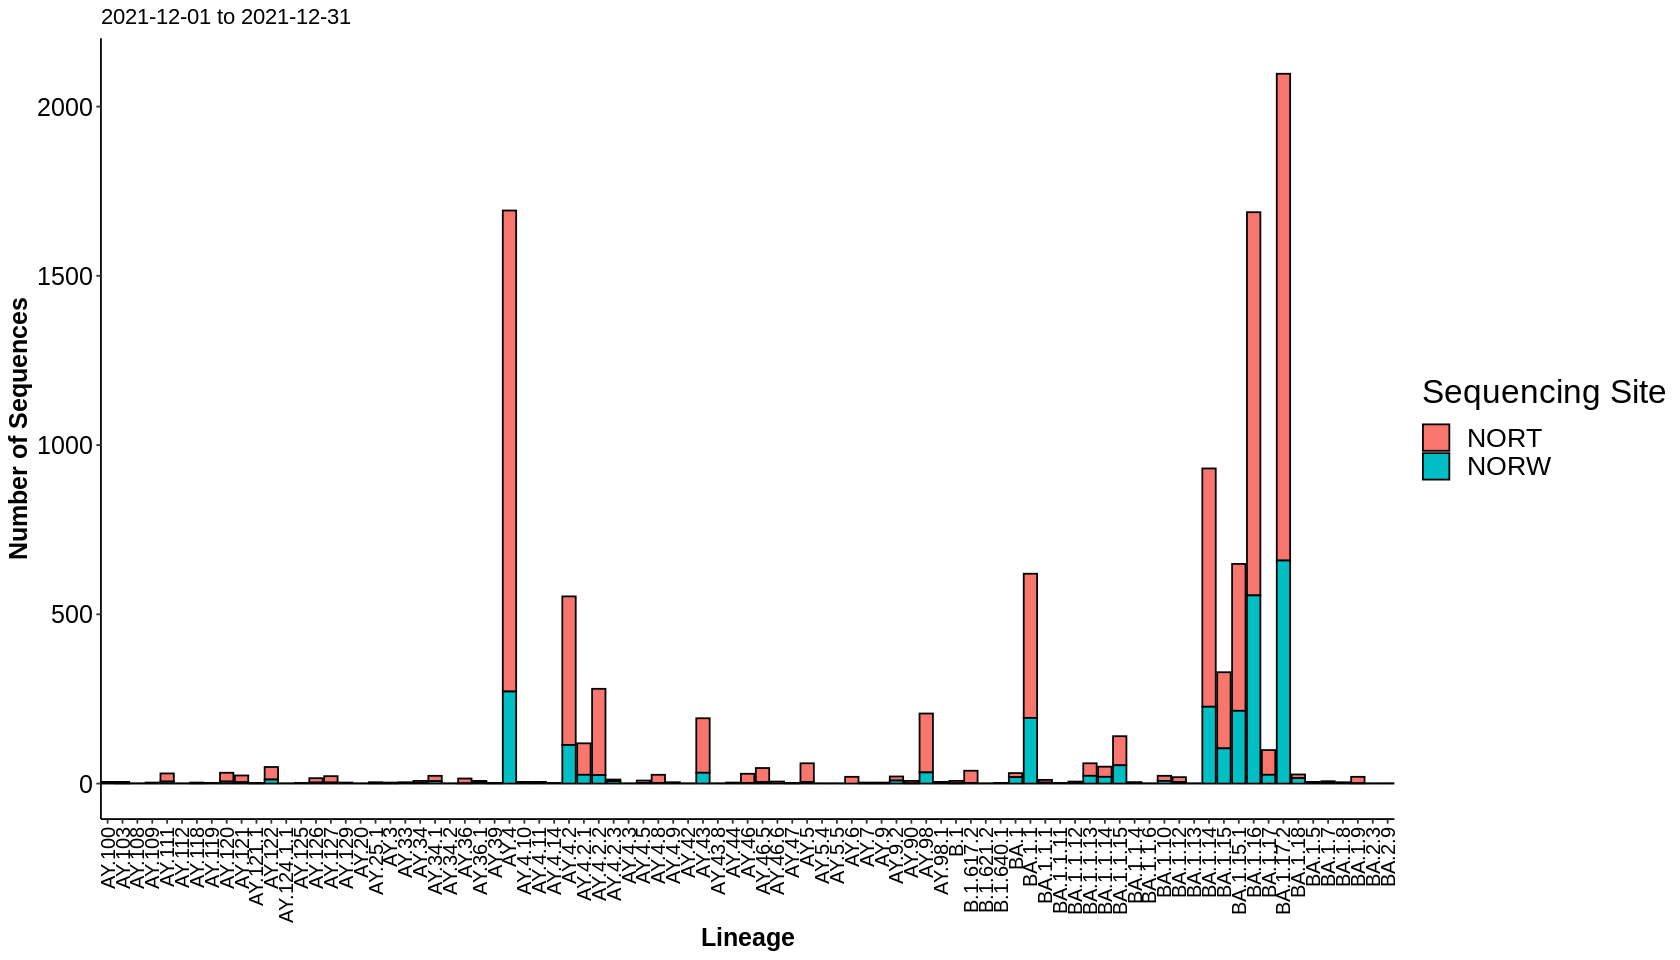

In [31]:
plot_lineages_choose_sites("2021-12-01", "2021-12-31", c("NORW", "NORT"))

And the same, for the duration of the Norfolk tree:

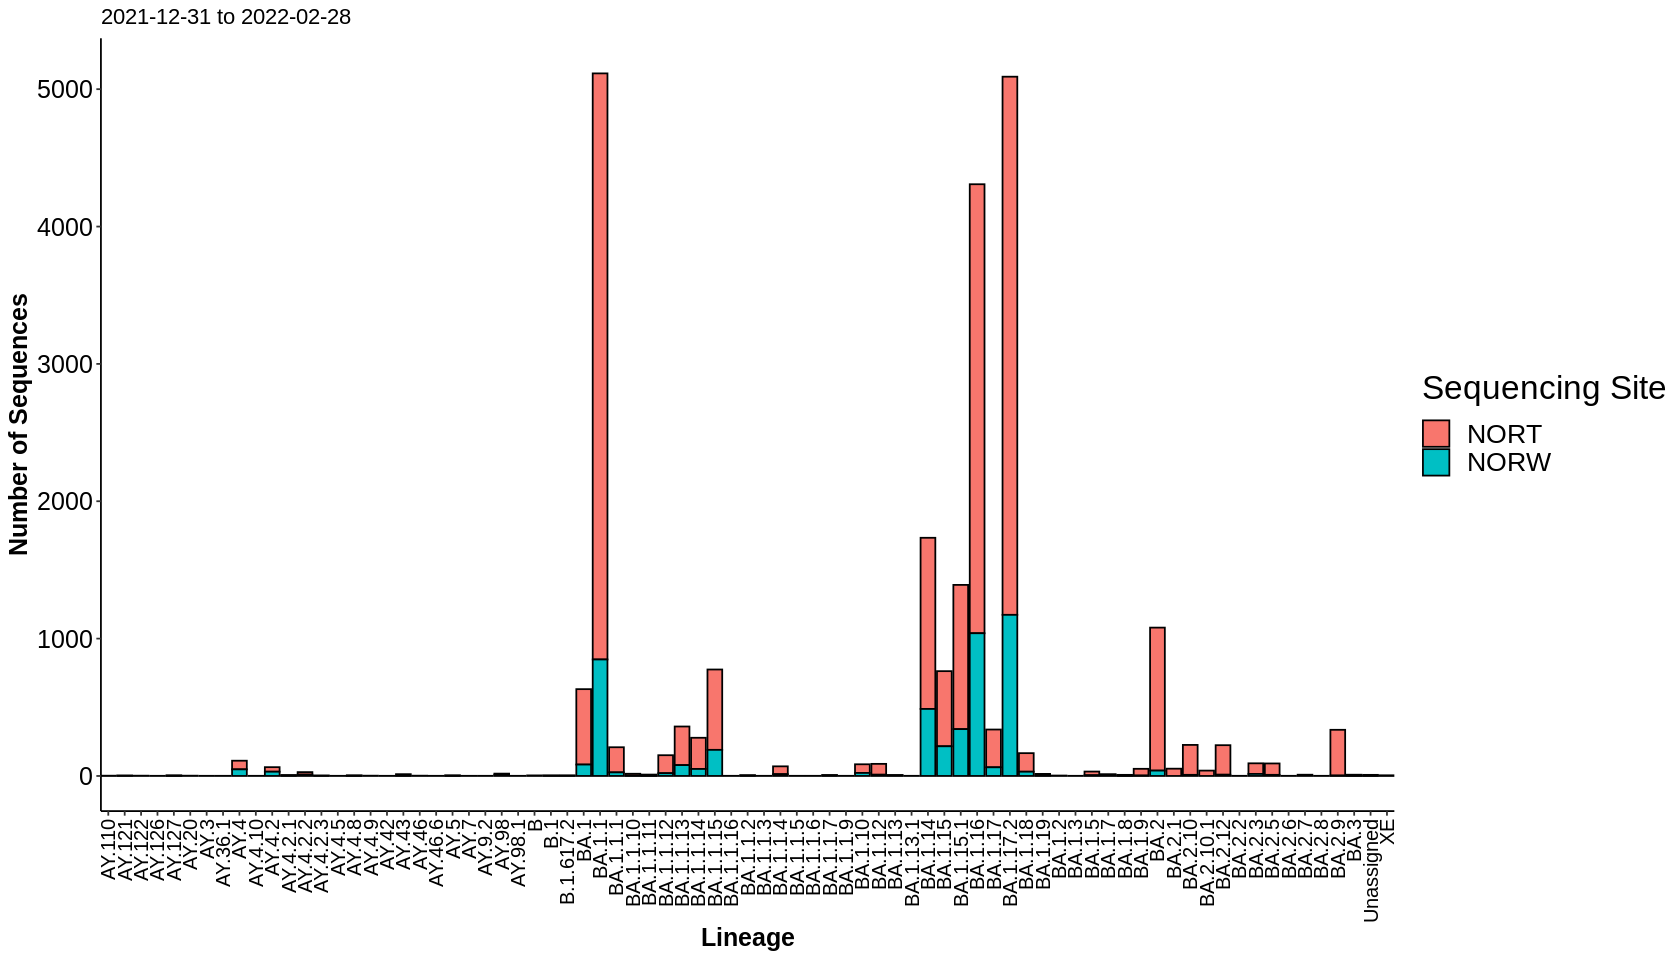

In [32]:
plot_lineages_choose_sites("2021-12-31", "2022-02-28", c("NORW", "NORT"))

Cambridge, Northumberland and Norwich for summer 2021 (June-August):

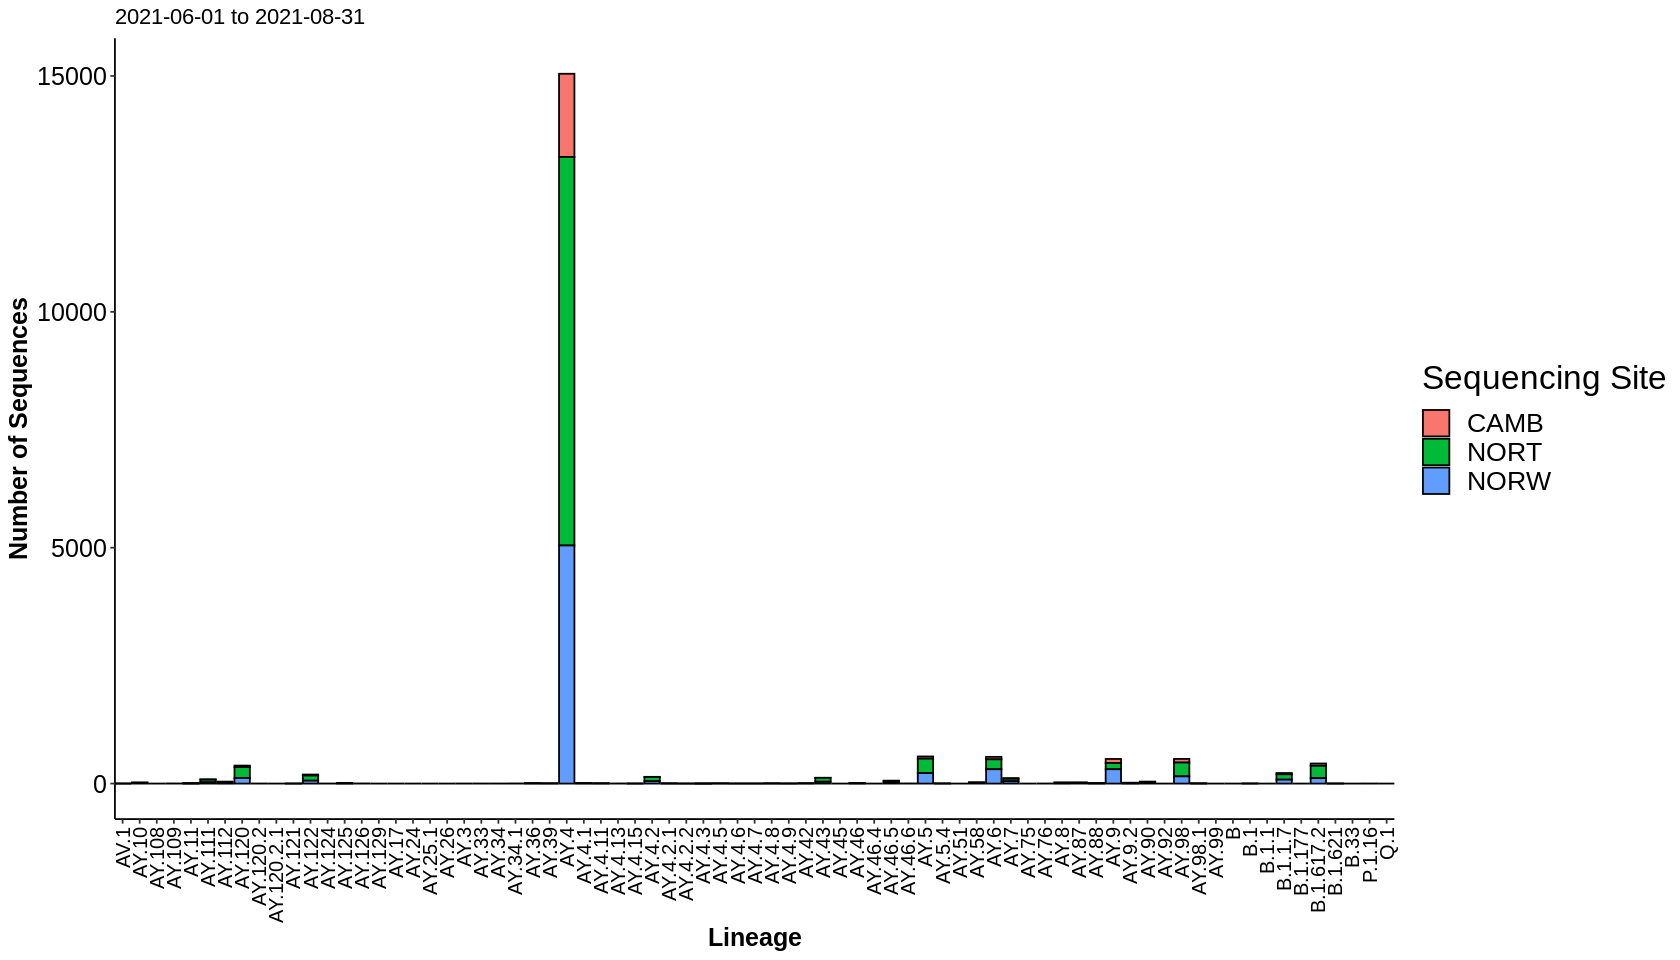

In [33]:
plot_lineages_choose_sites("2021-06-01", "2021-08-31", c("CAMB", "NORW", "NORT"))

Zooming in on the shorter data points:

In [34]:
plot_lineages_choose_sites_ylim <- function(start_date, end_date, centres, y_lim){

date_subset <- subset(england, (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
centre_subs2 <- filter(date_subset, grepl(paste(centres, collapse="|"), sequencing_centre))

p <- ggplot(centre_subs2, aes(x = lineage, fill=sequencing_centre)) + geom_bar(color='black')
p <- p + scale_x_discrete(expand=c(0.0001, 0))
p <- p + ylim(0, y_lim)
p <- p + scale_fill_discrete(name = "Sequencing Site")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Lineage") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=12, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(start_date, " to ", end_date))
p
}

Warning message:
“Removed 3 rows containing missing values (geom_bar).”


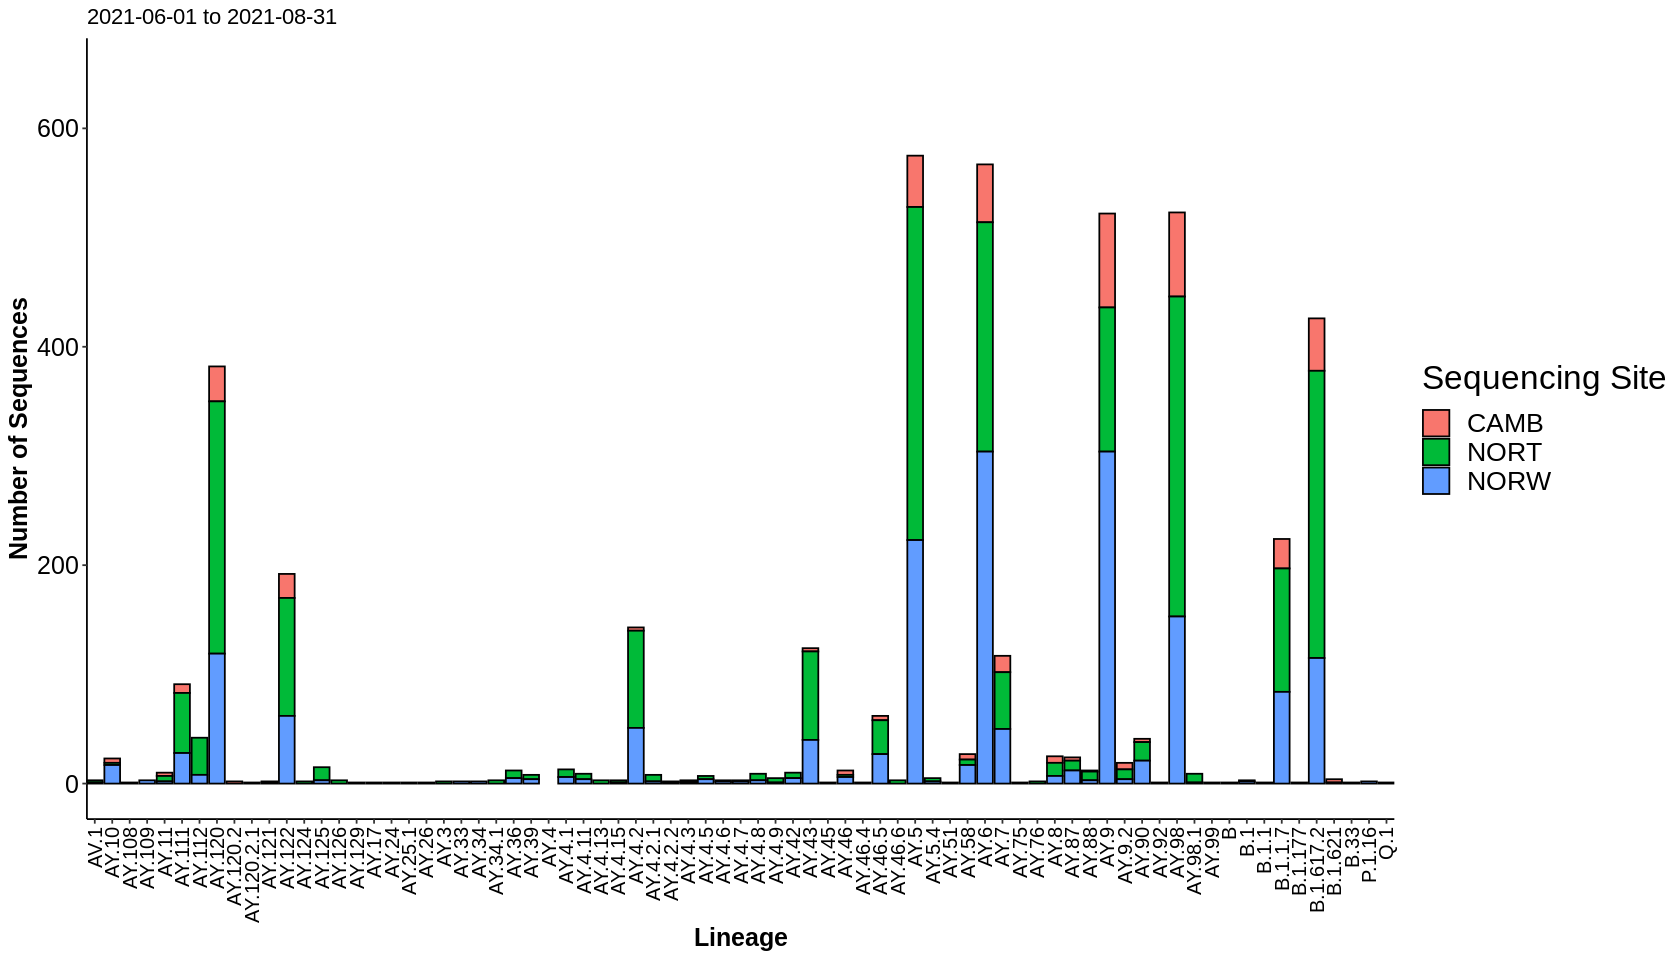

In [35]:
plot_lineages_choose_sites_ylim("2021-06-01", "2021-08-31", c("CAMB", "NORW", "NORT"), 650)

NORW, NORT and CAMB for autumn 2021 (September to December):

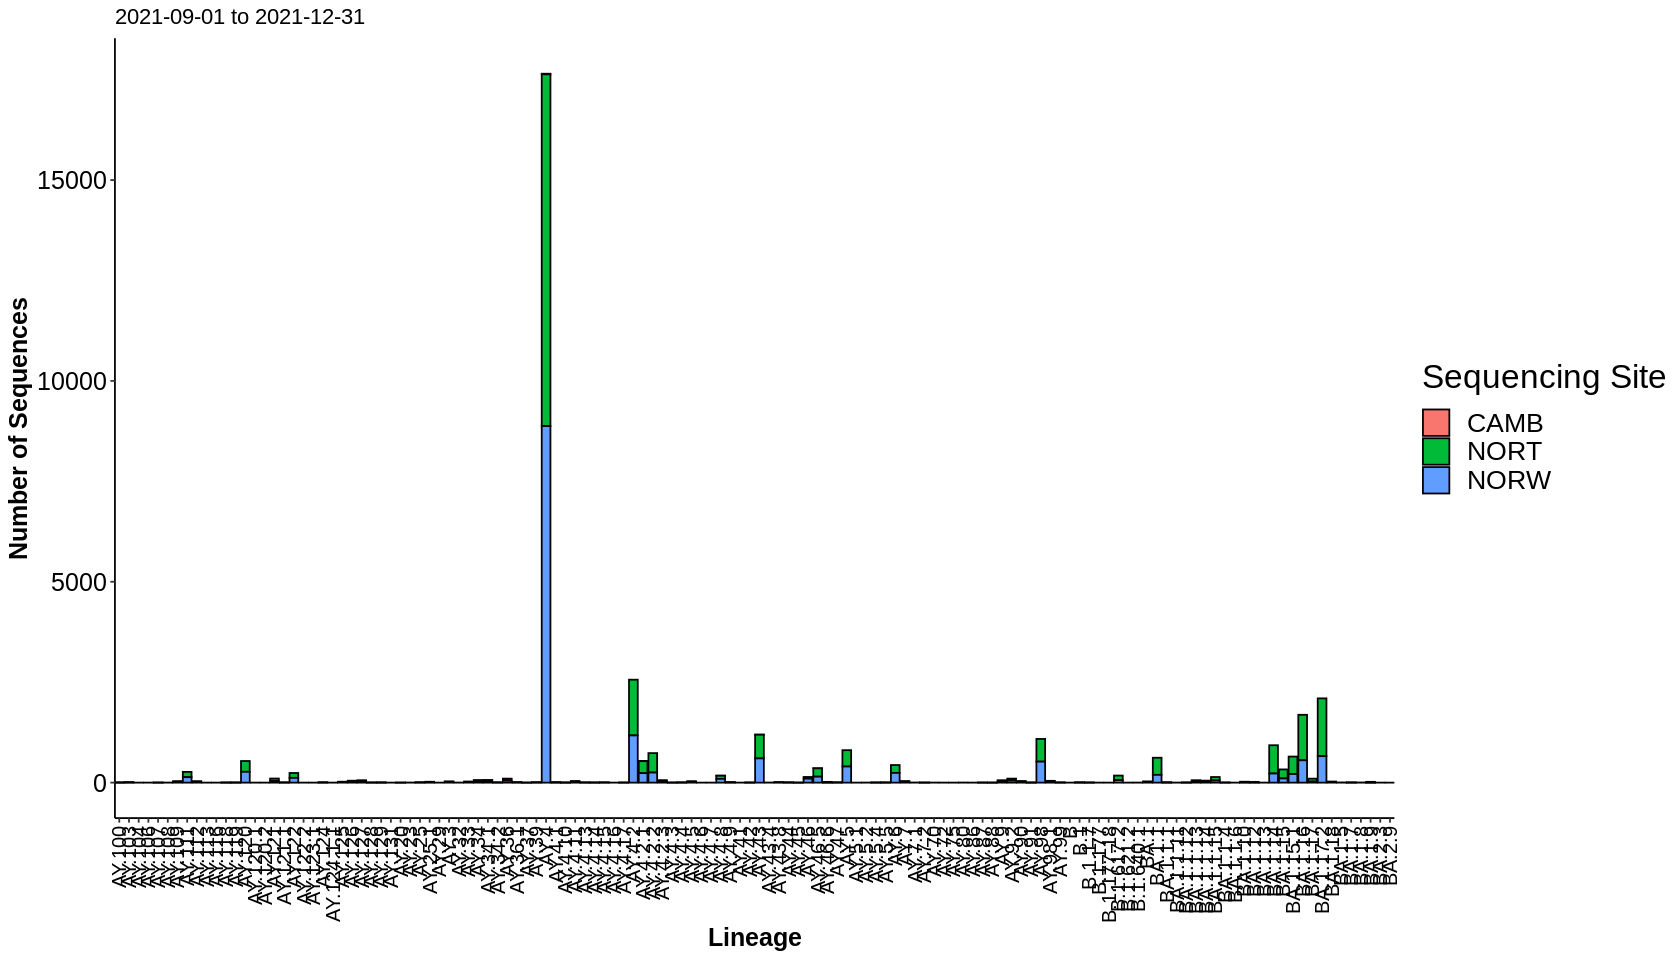

In [36]:
plot_lineages_choose_sites("2021-09-01", "2021-12-31", c("CAMB", "NORW", "NORT"))

And zooming in again:

Warning message:
“Removed 3 rows containing missing values (geom_bar).”


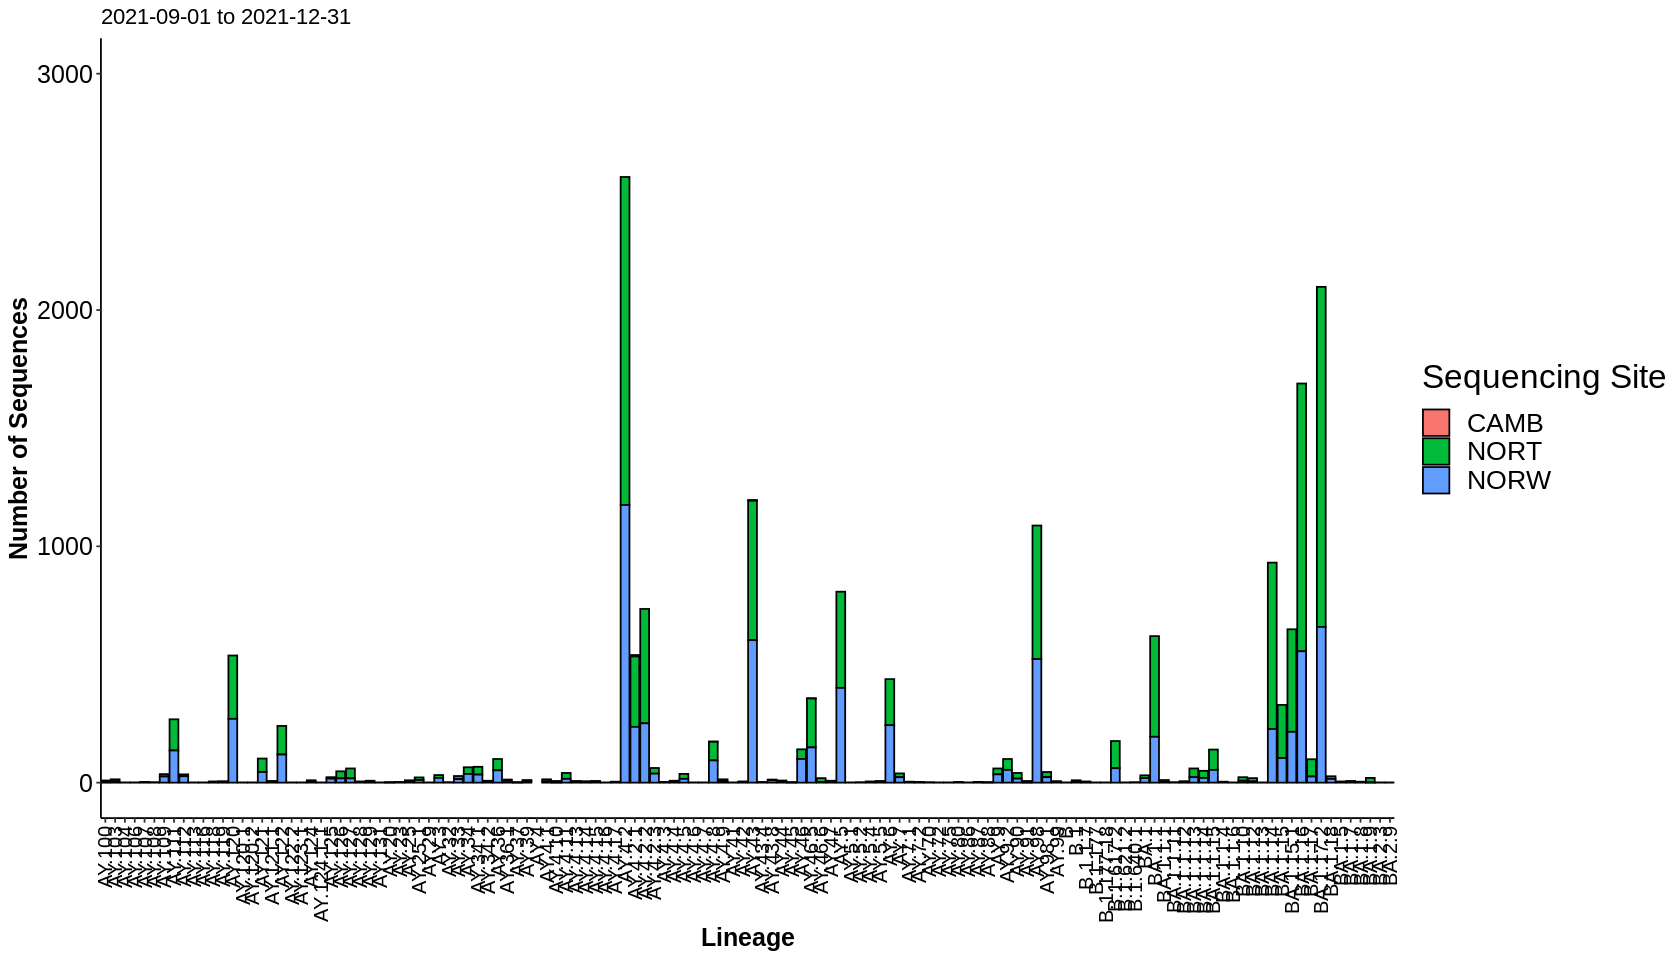

In [37]:
plot_lineages_choose_sites_ylim("2021-09-01", "2021-12-31", c("CAMB", "NORW", "NORT"), 3000)

There is very little if any data for CAMB for this time period.  NORT and NORW again look similar for the major lineages.

# Sequencing rates over time for individual codes

In [38]:
plot_lineage_counts <- function(start_date, end_date, centre){

date_subset <- subset(england_thresh[grep(centre, england_thresh$sequencing_centre), ], (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
    
p <- ggplot(date_subset, aes(x = sample_date, fill=sequencing_centre)) + geom_bar(color='black')
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Code")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sample Date") + ylab("Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=12, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

**December 2021**

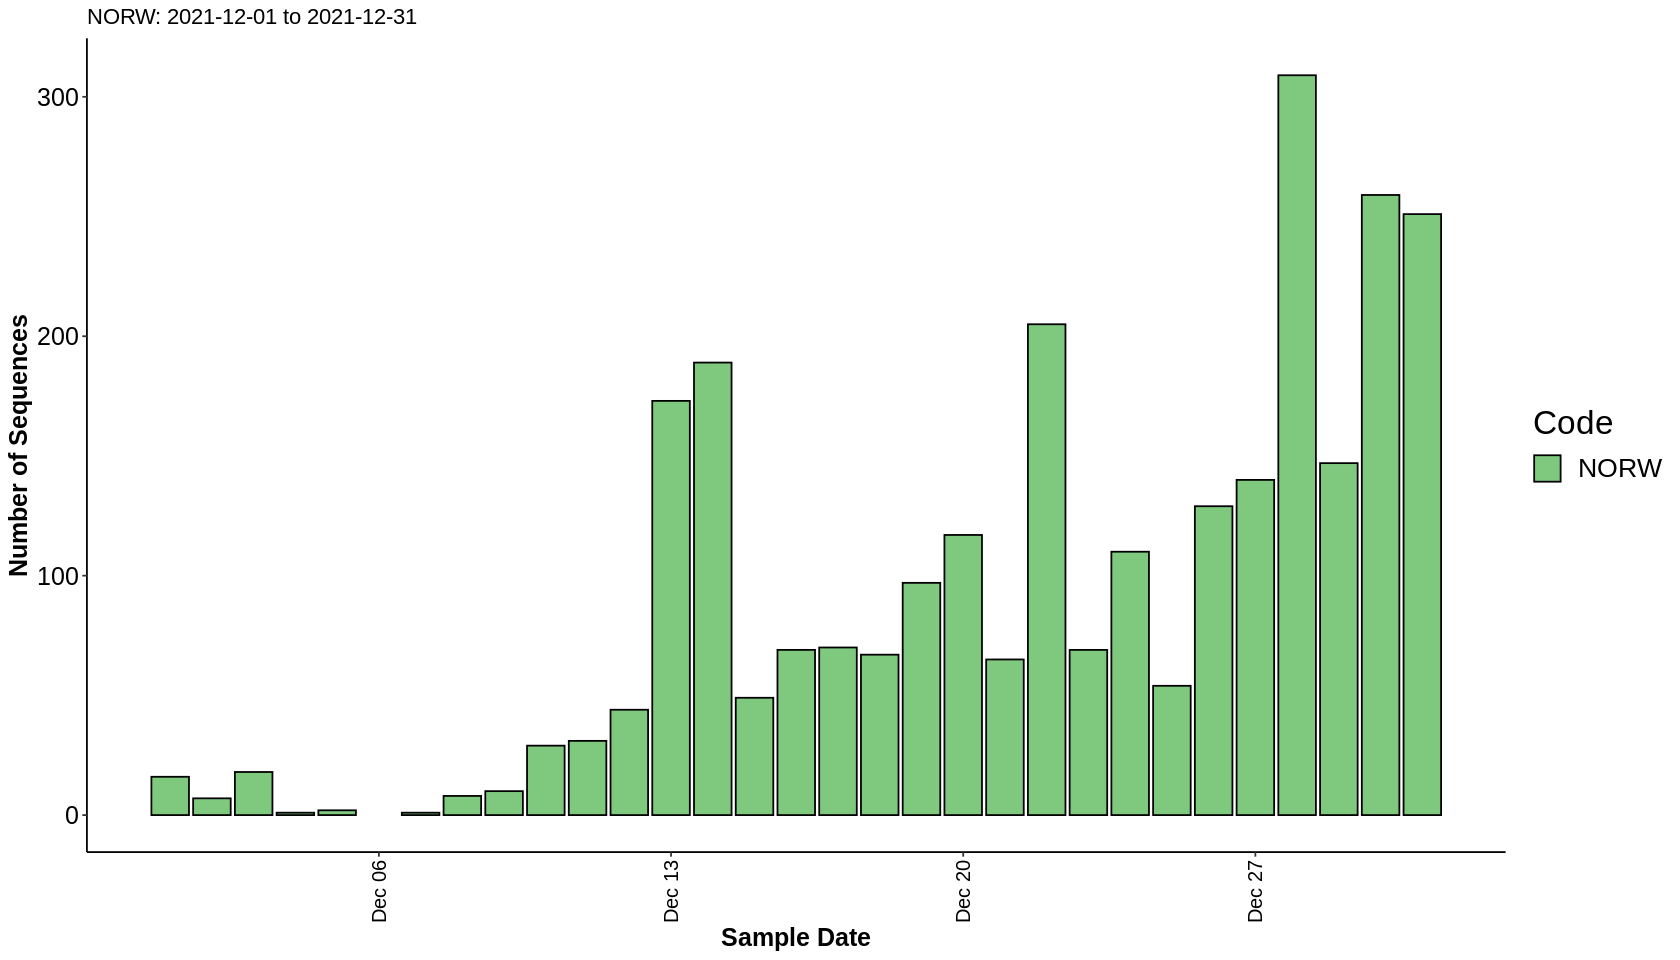

In [39]:
plot_lineage_counts("2021-12-01", "2021-12-31", "NORW")

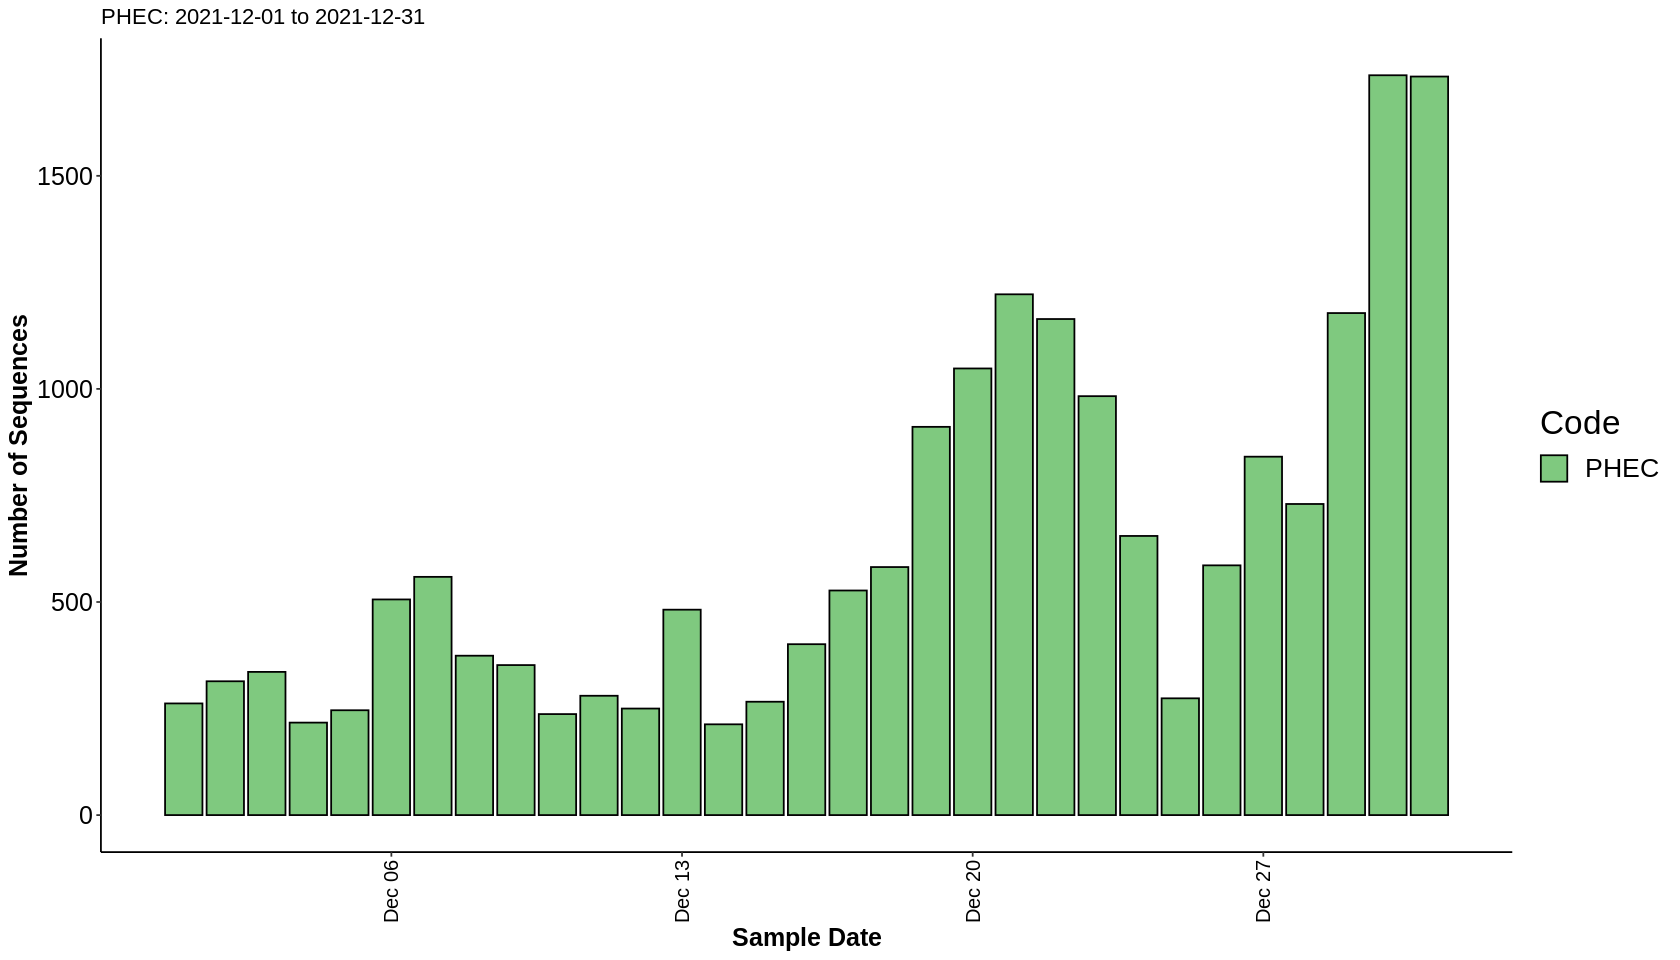

In [40]:
plot_lineage_counts("2021-12-01", "2021-12-31", "PHEC")

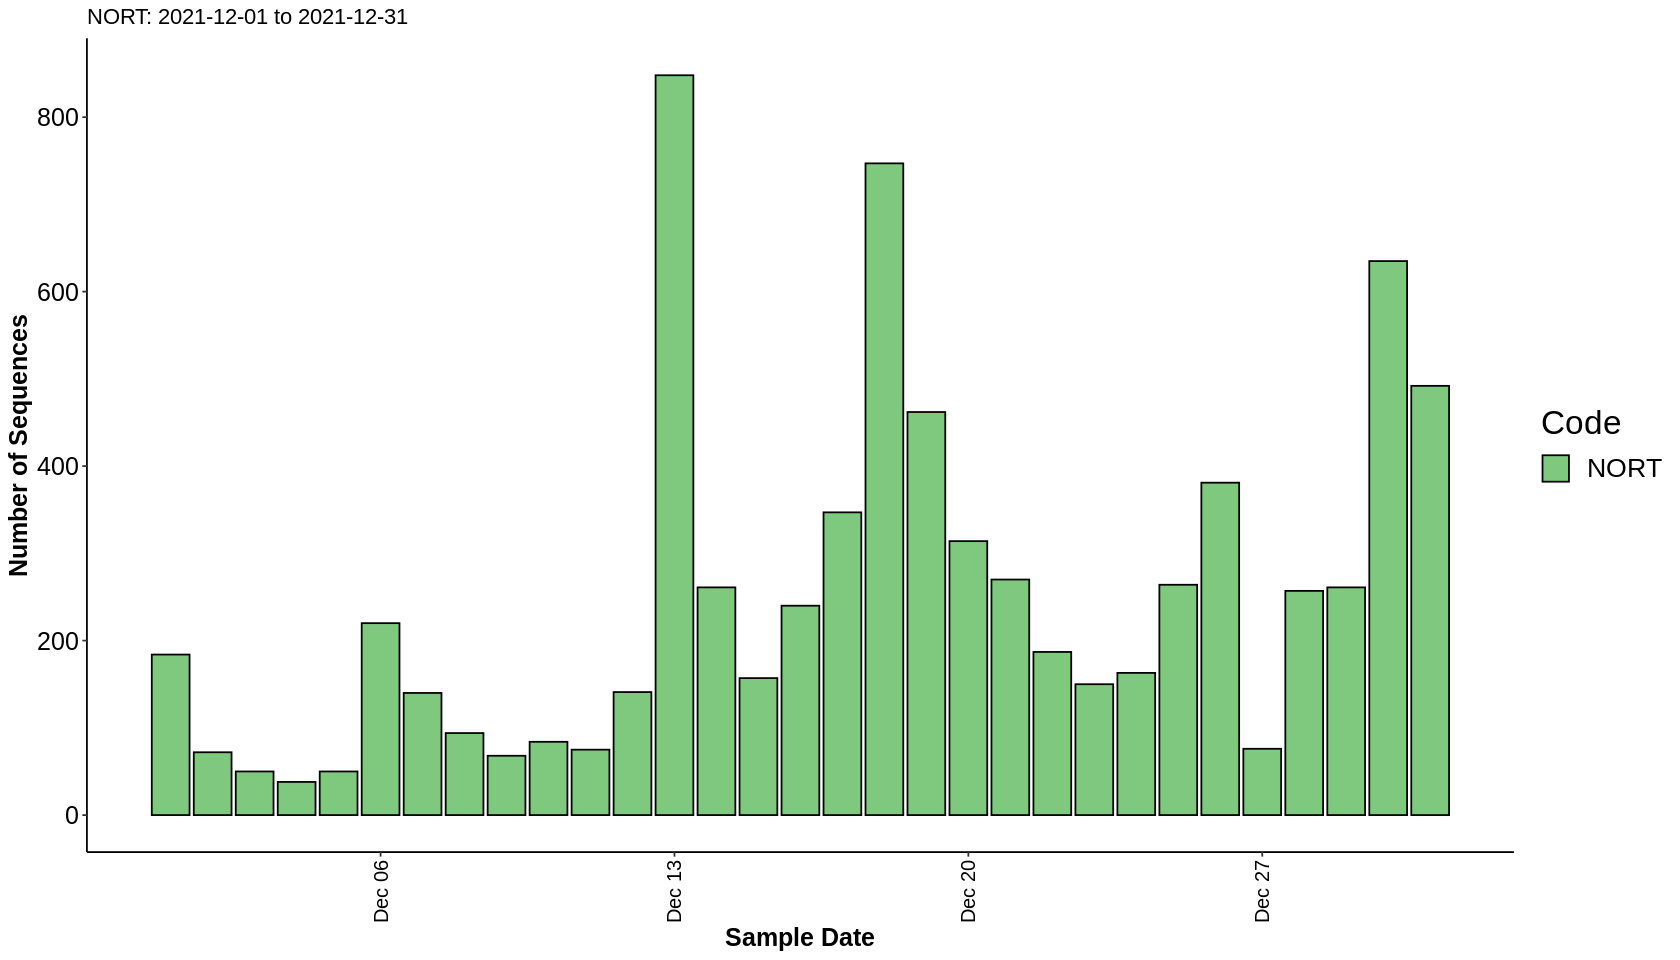

In [41]:
plot_lineage_counts("2021-12-01", "2021-12-31", "NORT")

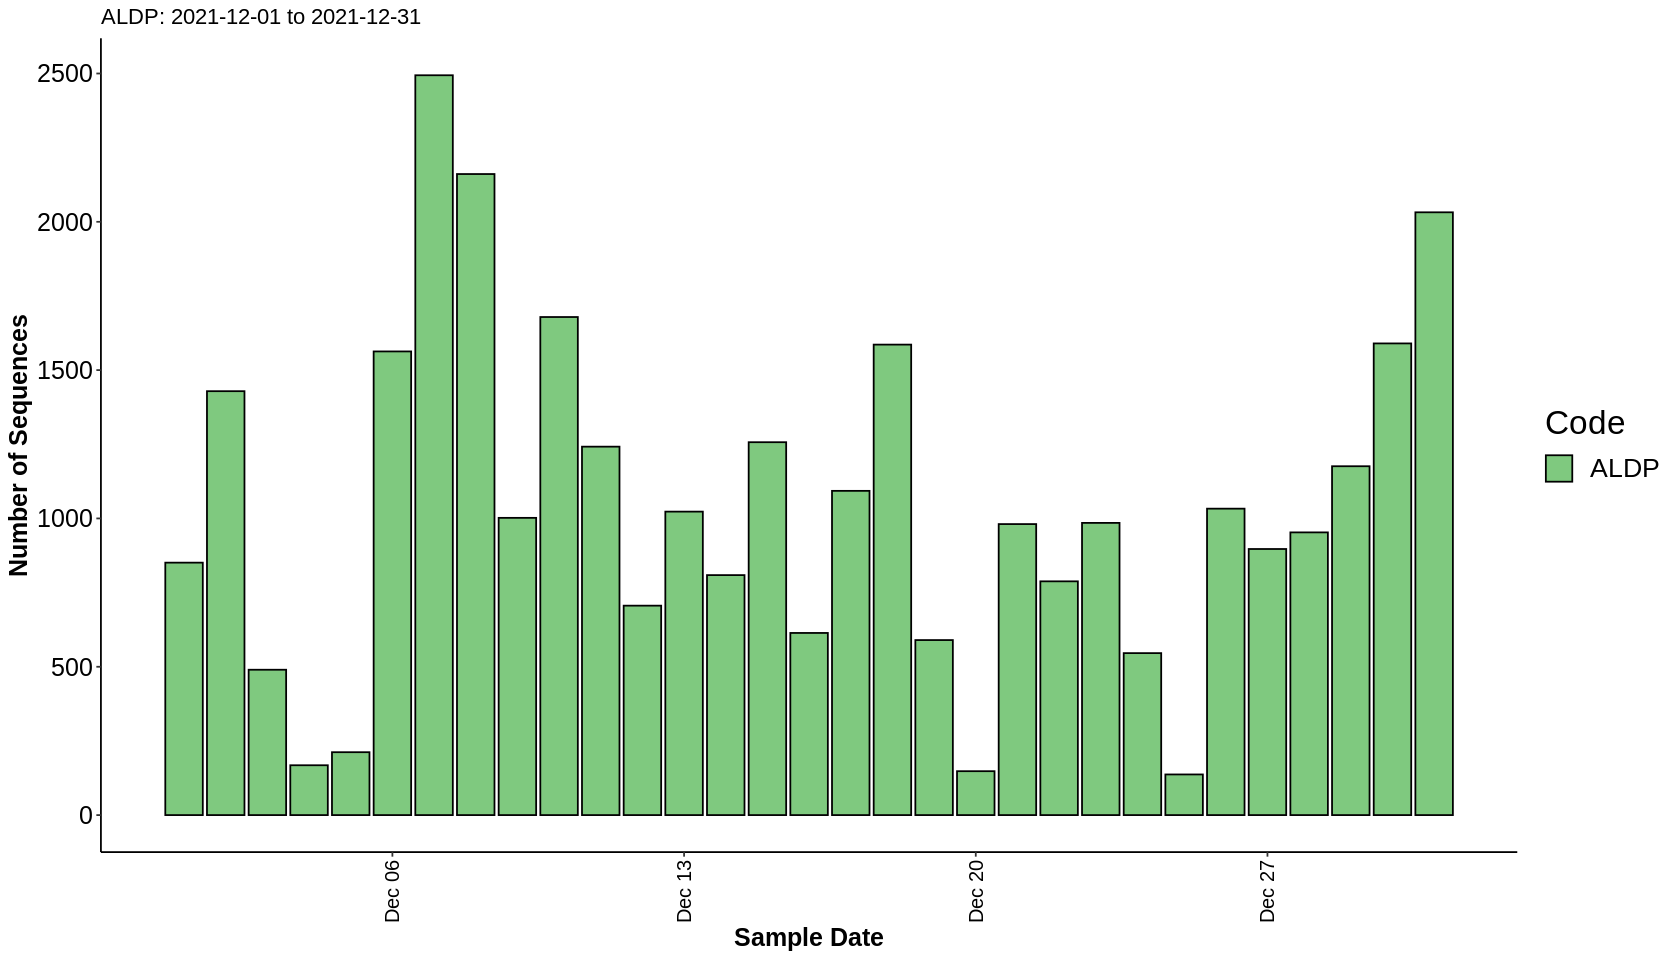

In [42]:
plot_lineage_counts("2021-12-01", "2021-12-31", "ALDP")

**Entire pandemic**

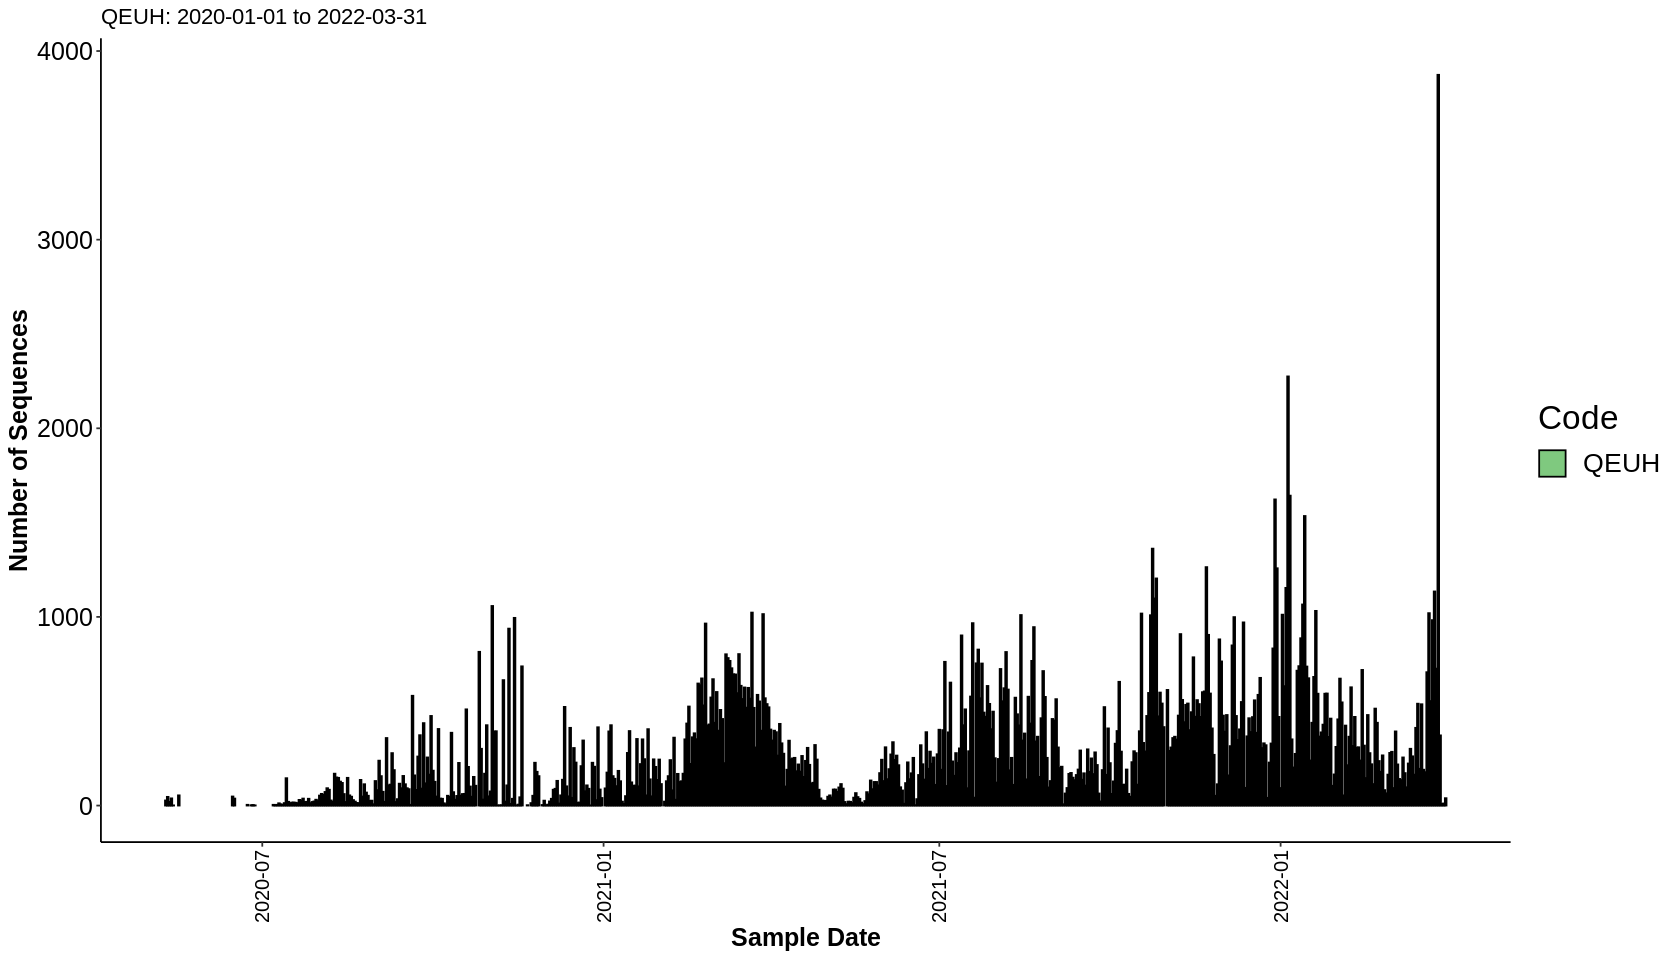

In [43]:
plot_lineage_counts("2020-01-01", "2022-03-31", "QEUH")

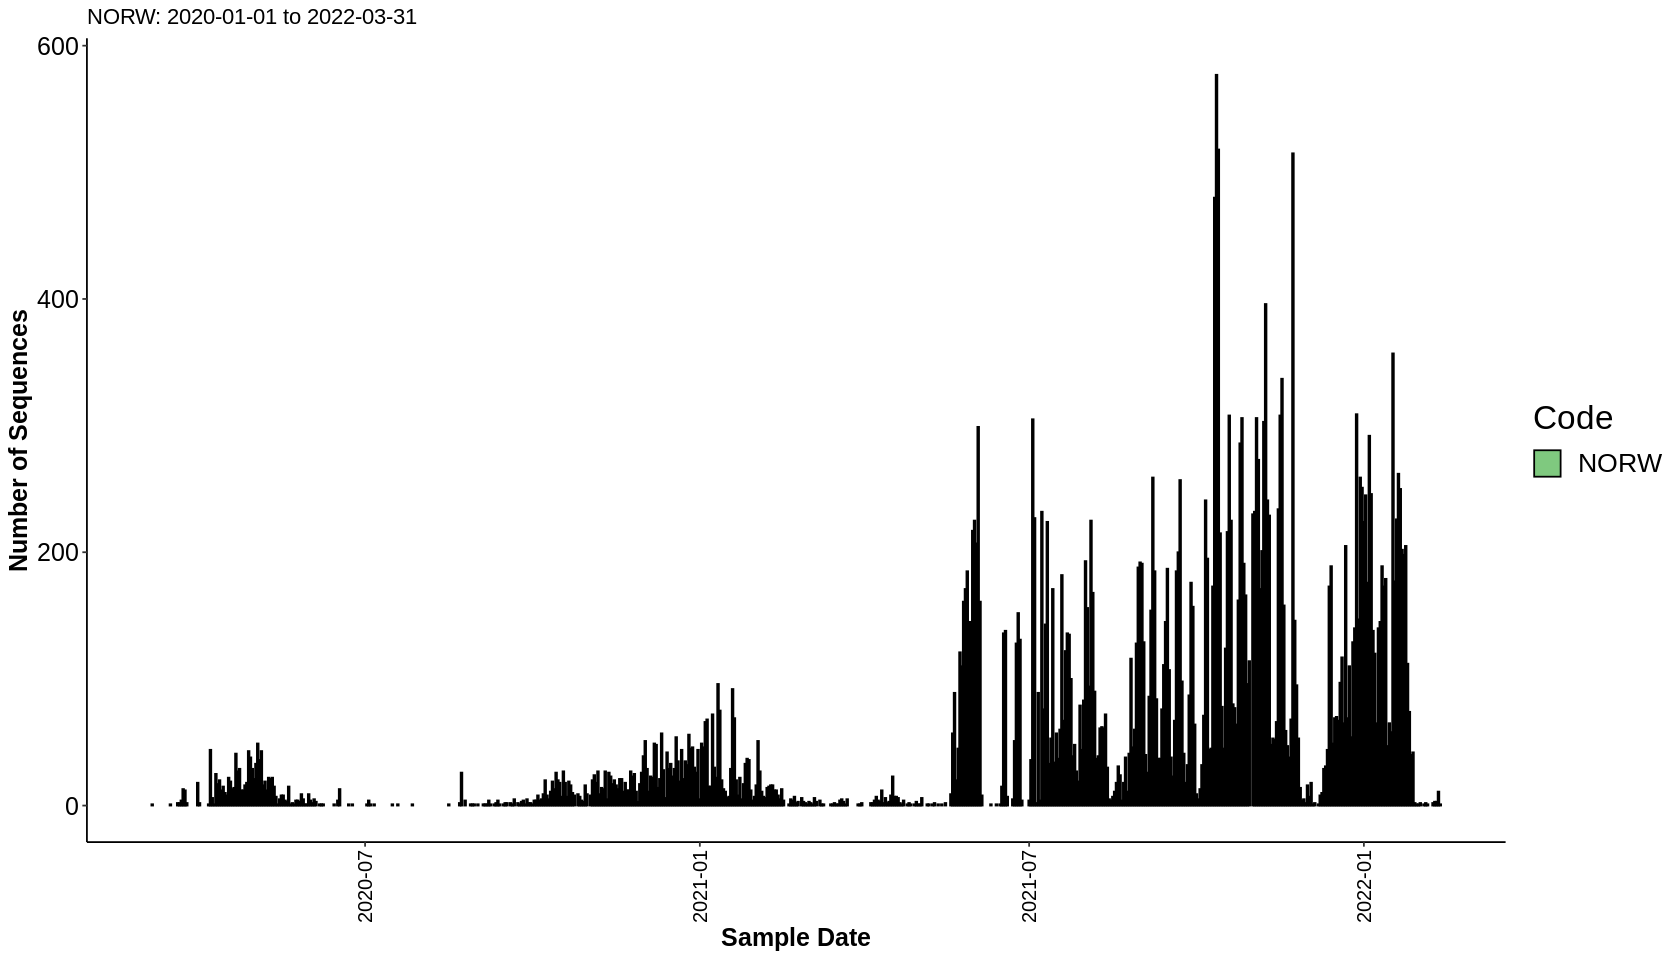

In [44]:
plot_lineage_counts("2020-01-01", "2022-03-31", "NORW")

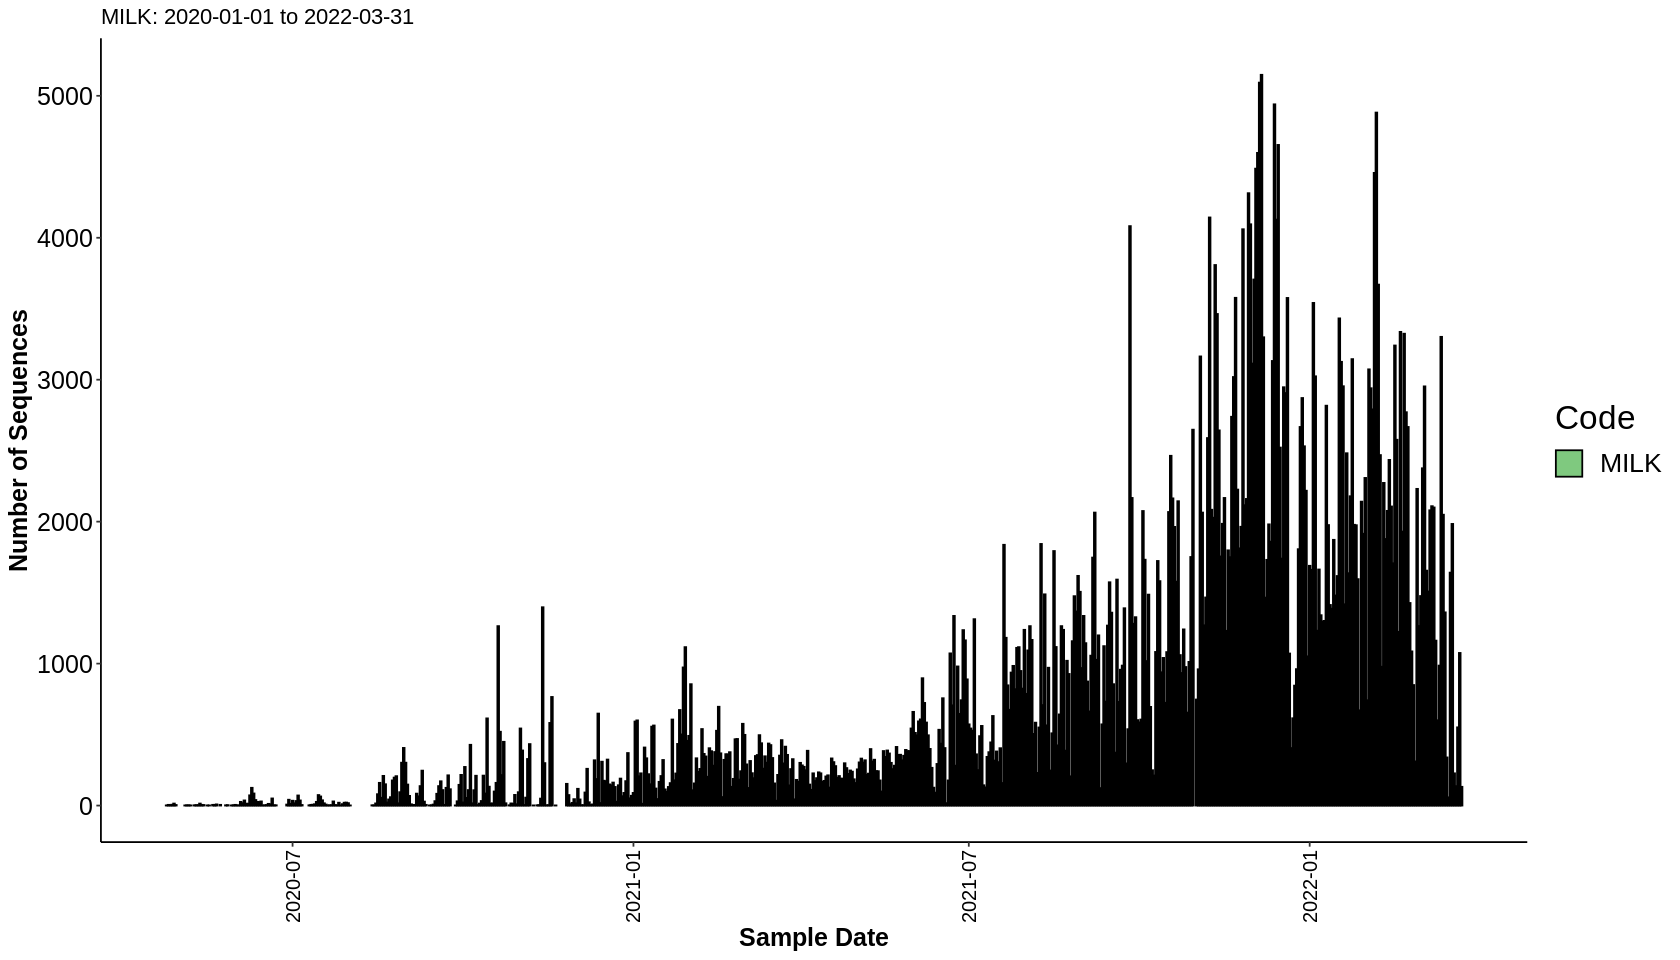

In [45]:
plot_lineage_counts("2020-01-01", "2022-03-31", "MILK")

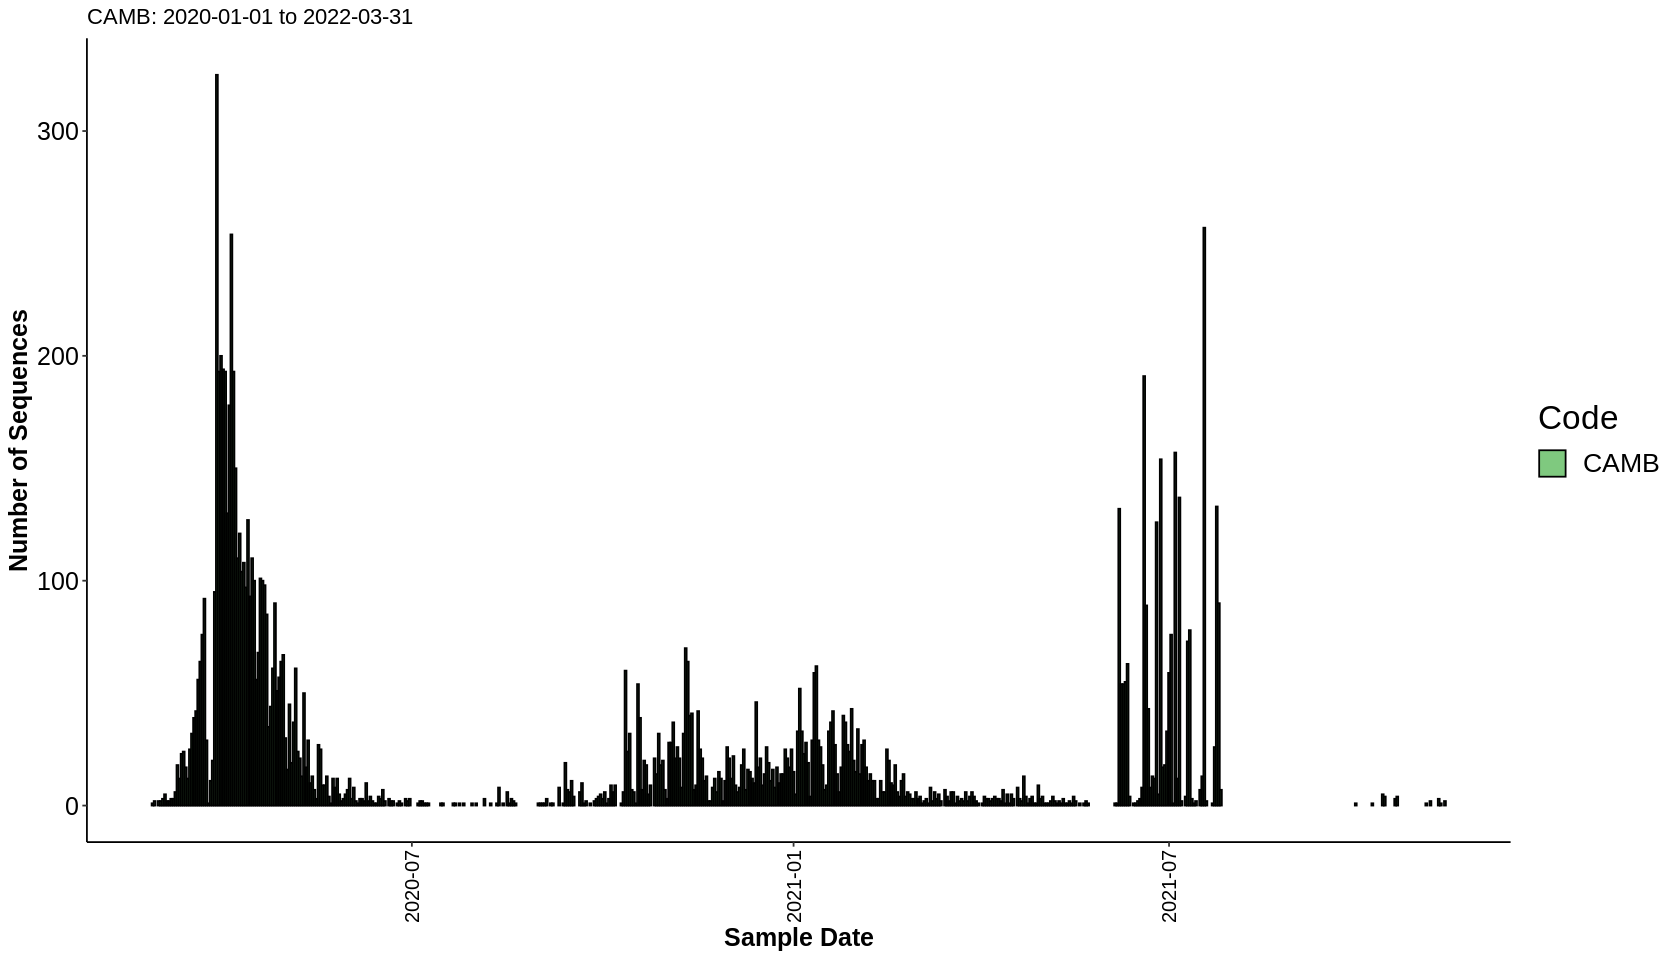

In [46]:
plot_lineage_counts("2020-01-01", "2022-03-31", "CAMB")

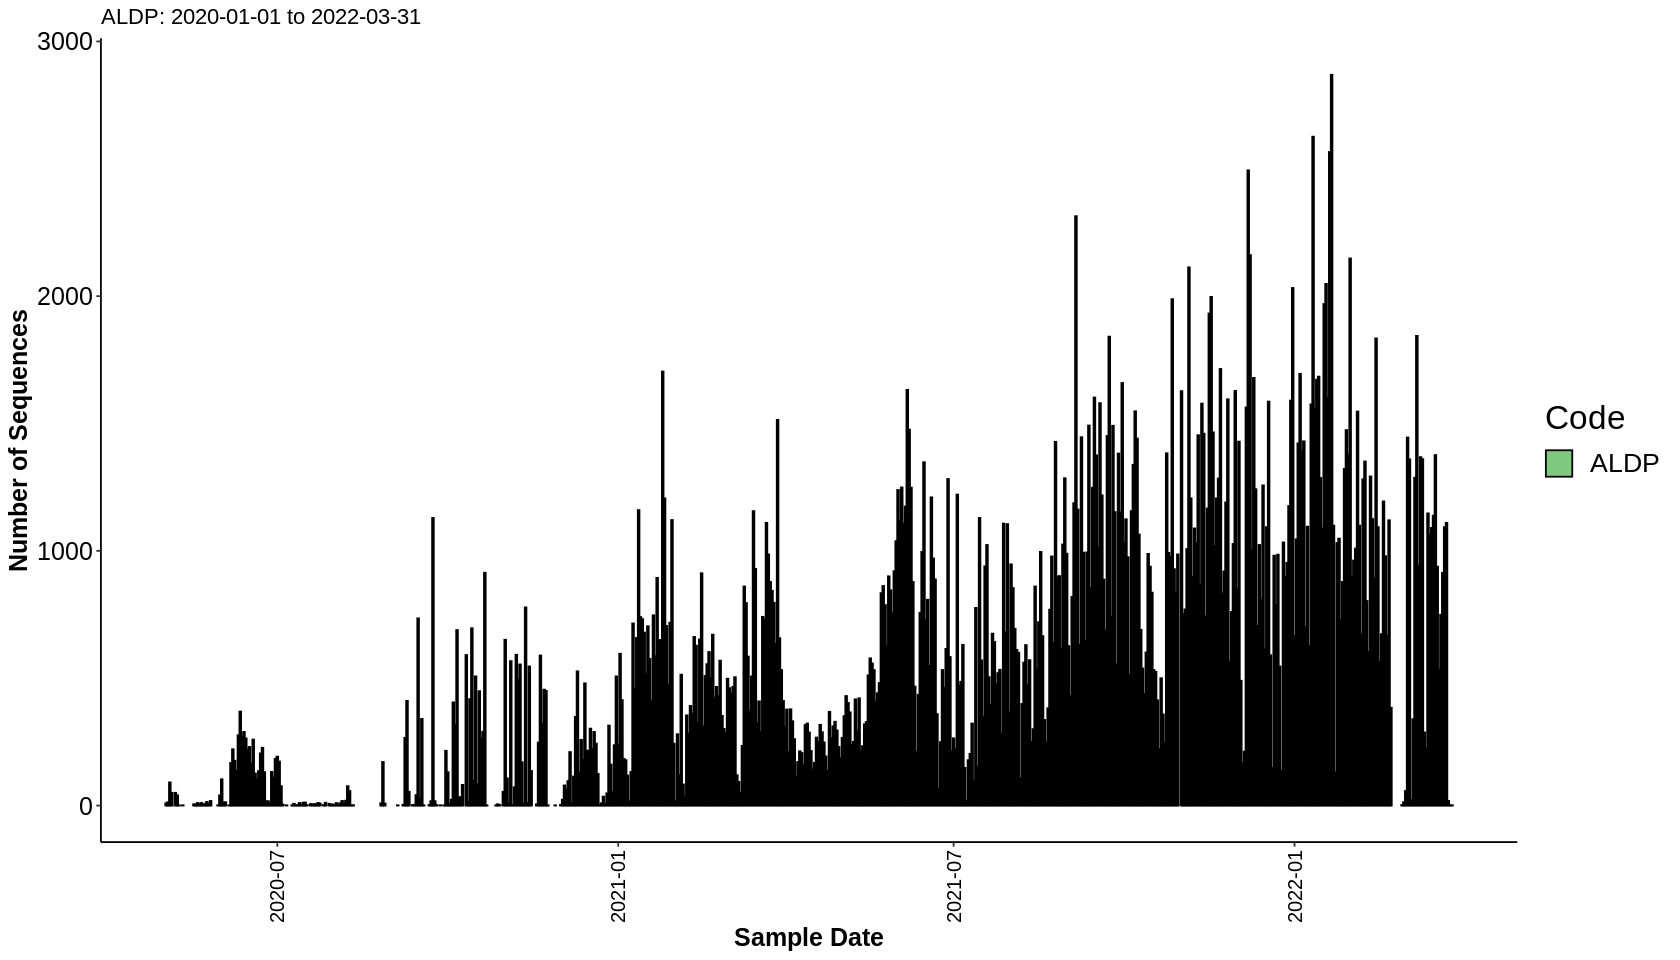

In [47]:
plot_lineage_counts("2020-01-01", "2022-03-31", "ALDP")

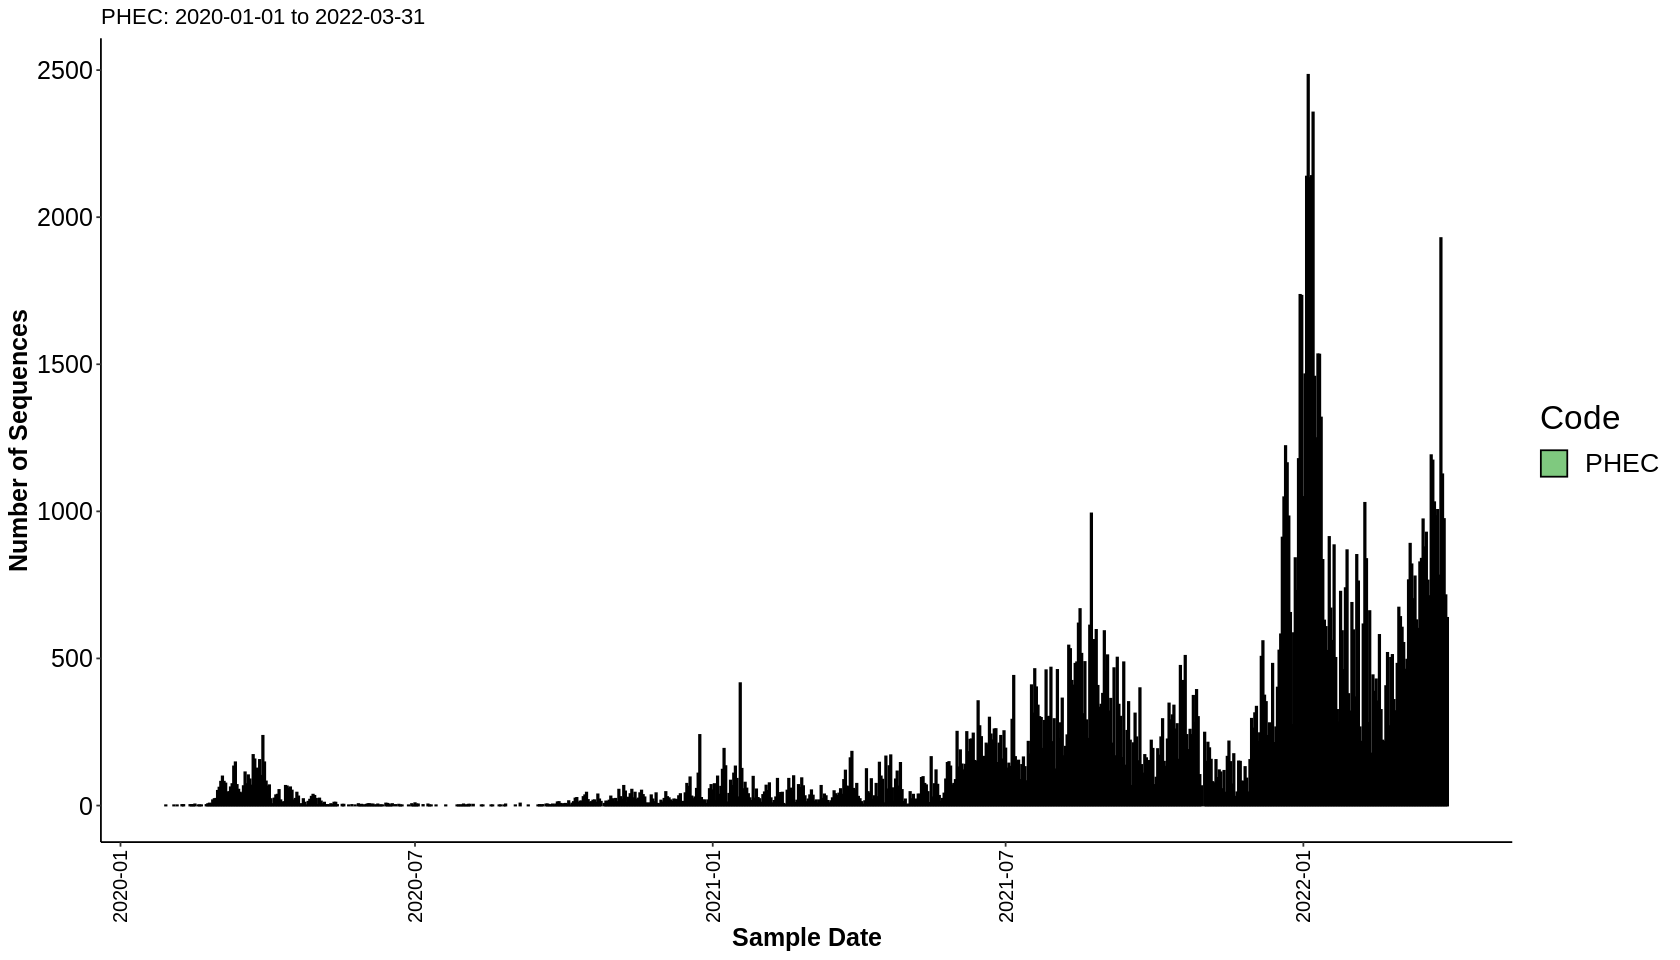

In [48]:
plot_lineage_counts("2020-01-01", "2022-03-31", "PHEC")

# Lineages present over time (proportional)

In [49]:
plot_lineage_contributions <- function(start_date, end_date, centre){

date_subset <- subset(england_thresh[grep(centre, england_thresh$sequencing_centre), ], (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
getPal_lineage  = colorRampPalette(brewer.pal(8,"Accent"))(length(unique(date_subset$lineage)))
    
p <- ggplot(date_subset, aes(x = date2, fill=lineage)) + geom_bar(position='fill', width=12,color='black')  ## geom_bar()
p <- p + ggplot2::scale_fill_manual(values=getPal_lineage, name="Lineage")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Proportion of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c(start_date,end_date)))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

Warning message:
“Removed 123 rows containing non-finite values (stat_count).”
Warning message:
“Removed 37 rows containing missing values (geom_bar).”


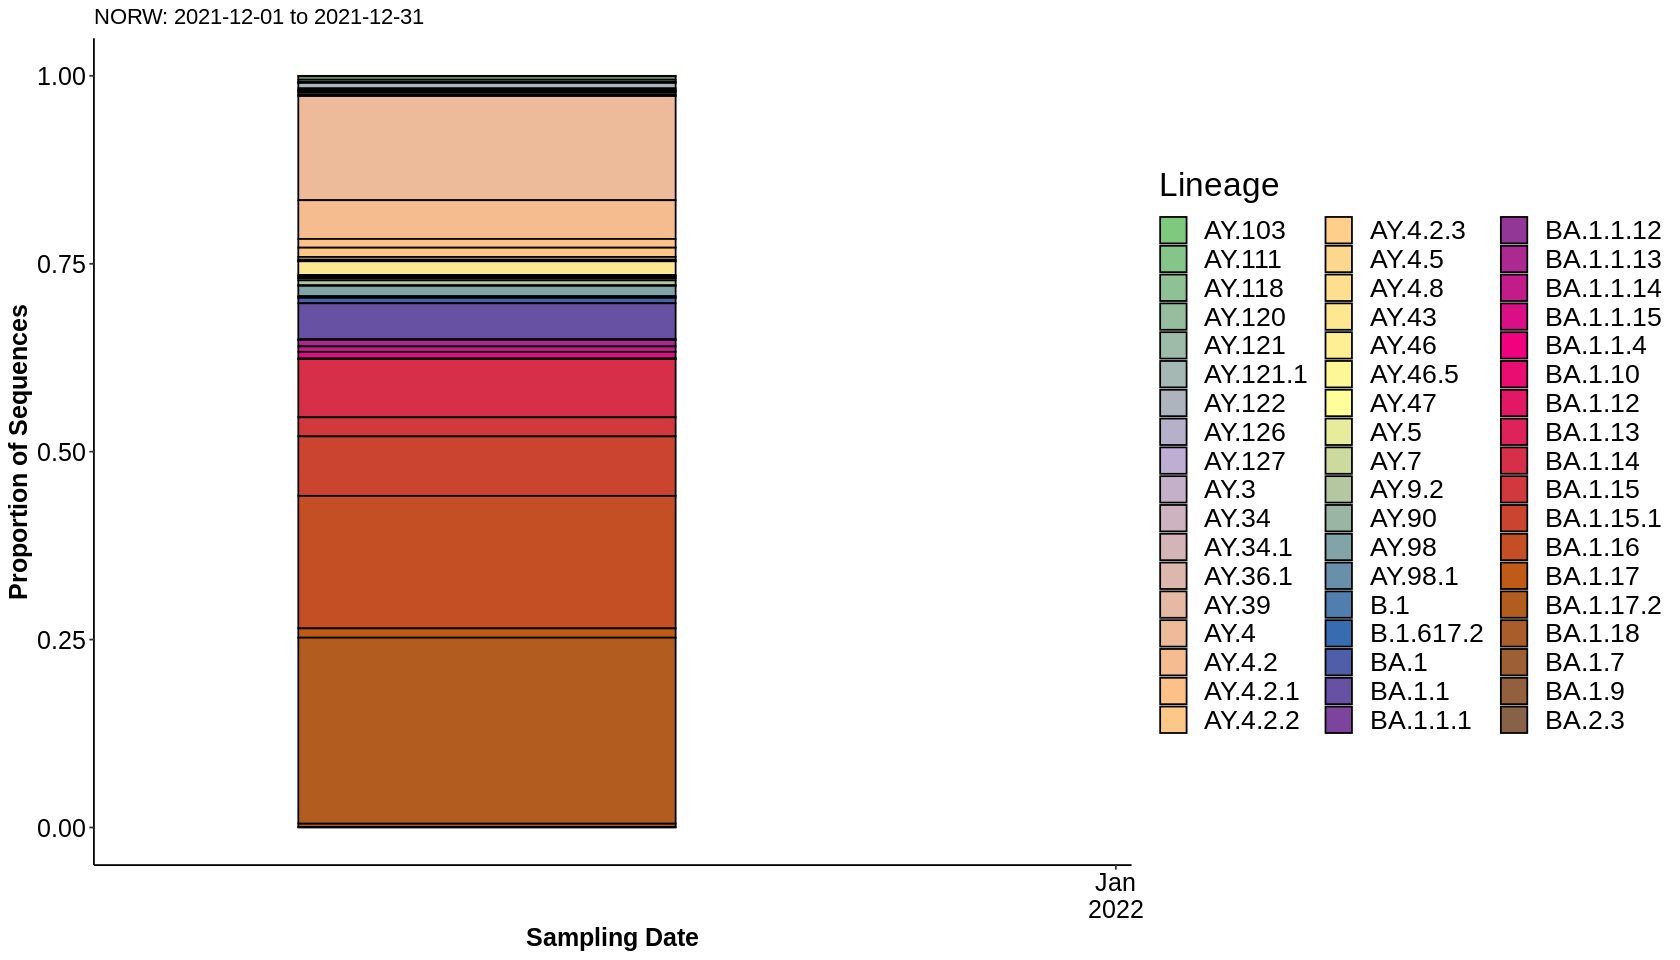

In [50]:
plot_lineage_contributions("2021-12-01", "2021-12-31", "NORW") 

# Lineages present over time (counts)

In [51]:
plot_lineage_counts_2w <- function(start_date, end_date, centre){

date_subset <- subset(england_thresh[grep(centre, england_thresh$sequencing_centre), ], (sample_date >= as.Date(start_date) & sample_date <= as.Date(end_date))) #just an end date for now
getPal_lineage  = colorRampPalette(brewer.pal(8,"Accent"))(length(unique(date_subset$lineage)))
    
p <- ggplot(date_subset, aes(x = date2, fill=lineage)) + geom_bar(color='black')  ## geom_bar()
p <- p + ggplot2::scale_fill_manual(values=getPal_lineage, name="Lineage")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sampling Date") + ylab("Proportion of Sequences")
p <- p + scale_x_date(date_labels = "%b\n%Y",date_breaks = "2 months", date_minor_breaks = "1 month", limits = as.Date(c(start_date,end_date)))
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p <- p + labs(title = paste0(centre, ": ", start_date, " to ", end_date))
p
}

Warning message:
“Removed 123 rows containing non-finite values (stat_count).”
Warning message:
“Removed 37 rows containing missing values (geom_bar).”


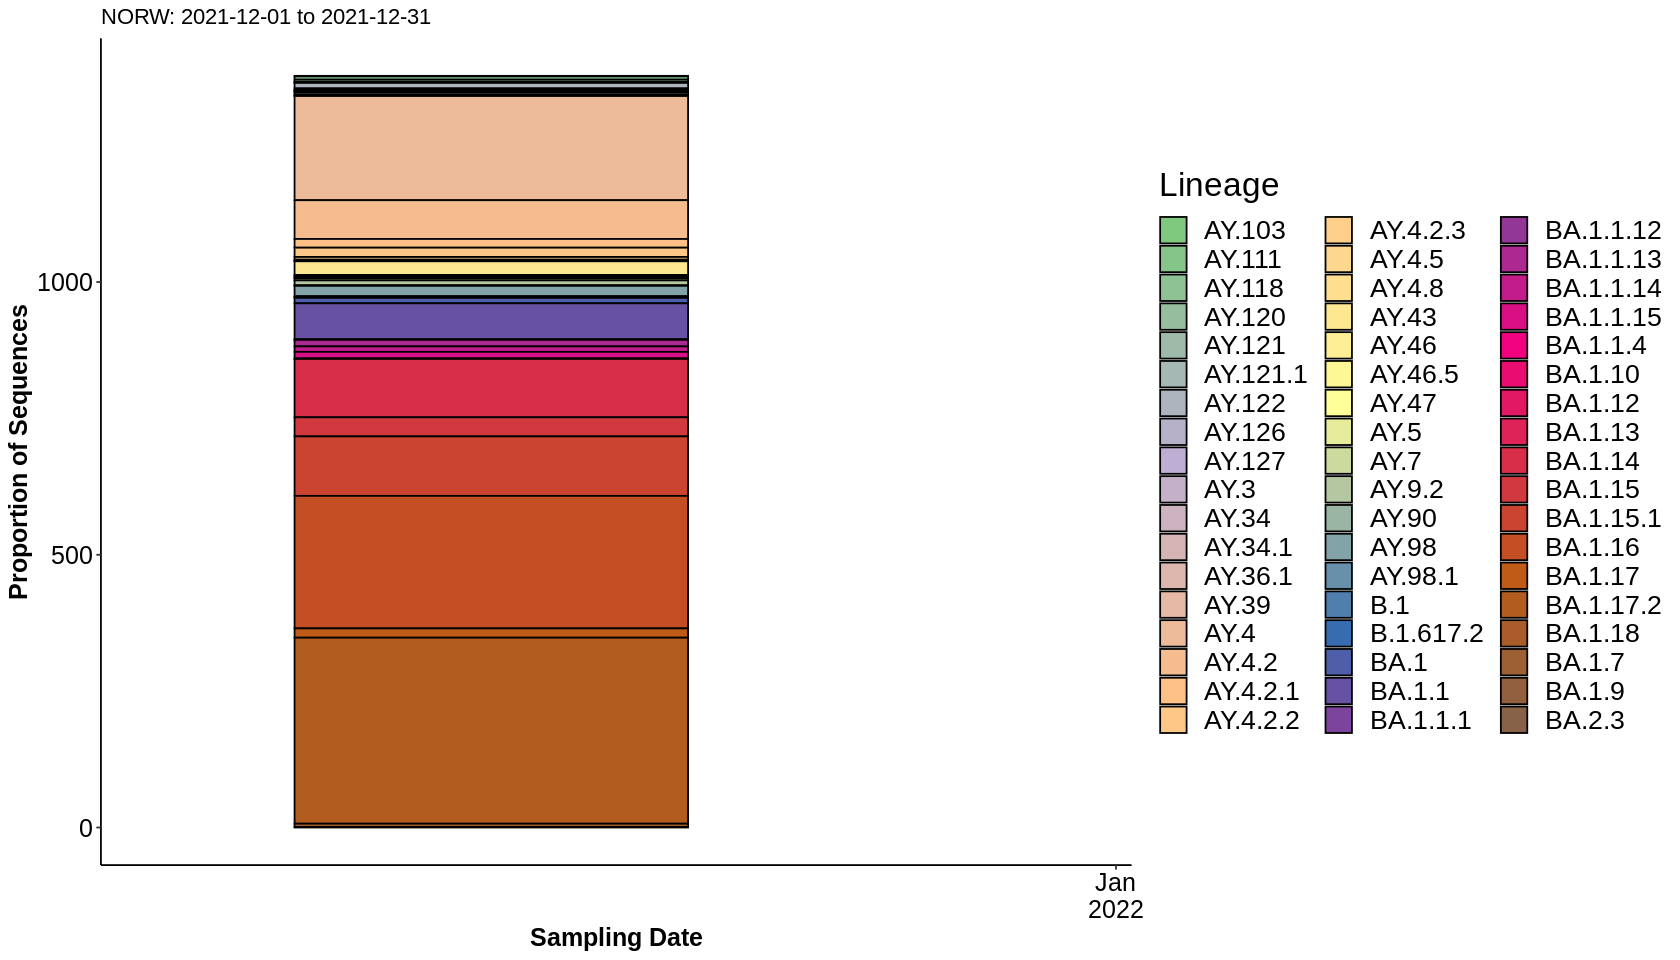

In [52]:
plot_lineage_counts_2w("2021-12-01", "2021-12-31", "NORW")

# Cohorts to look more closely at

In choosing a cohort, there are a few things that will be good to have:
* similar sequencing rates throughout the time period
* consistent sequencing throughout the pandemic? this would mean time periods could be compared

So, for NORW, maybe the fall of 2020.  But, this has been analysed before.  I could take the most diverse sequences from recent data (just 2022).

I could try looking at each wave separately, to see 
* what lineages there are and when
* what the tree looks like: and then, zoom in on an individual clade over all time (eg. show all the Deltas in NORW, plus a little bit before the first one).

Here's NORW over all time again, for picking waves:

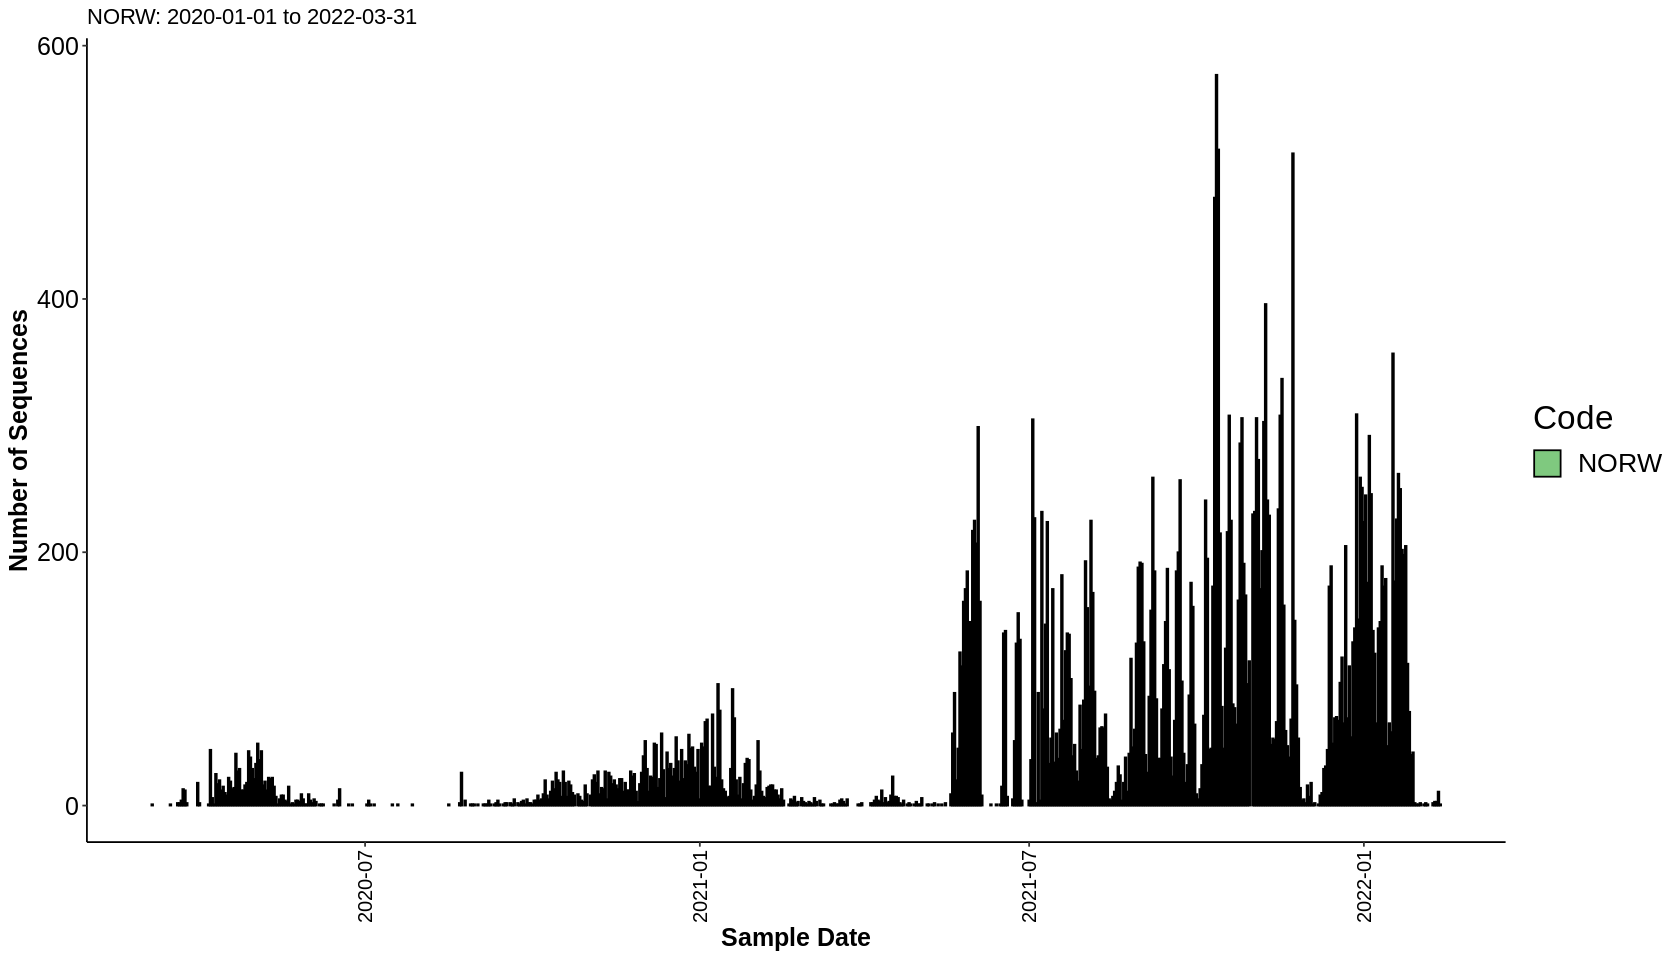

In [53]:
plot_lineage_counts("2020-01-01", "2022-03-31", "NORW")

The first two waves are clearest here, and the others are harder to see.  January 1, 2020 to June 30, 2020 could be a good one to start with.

Zooming in on this plot to try and find the different waves:

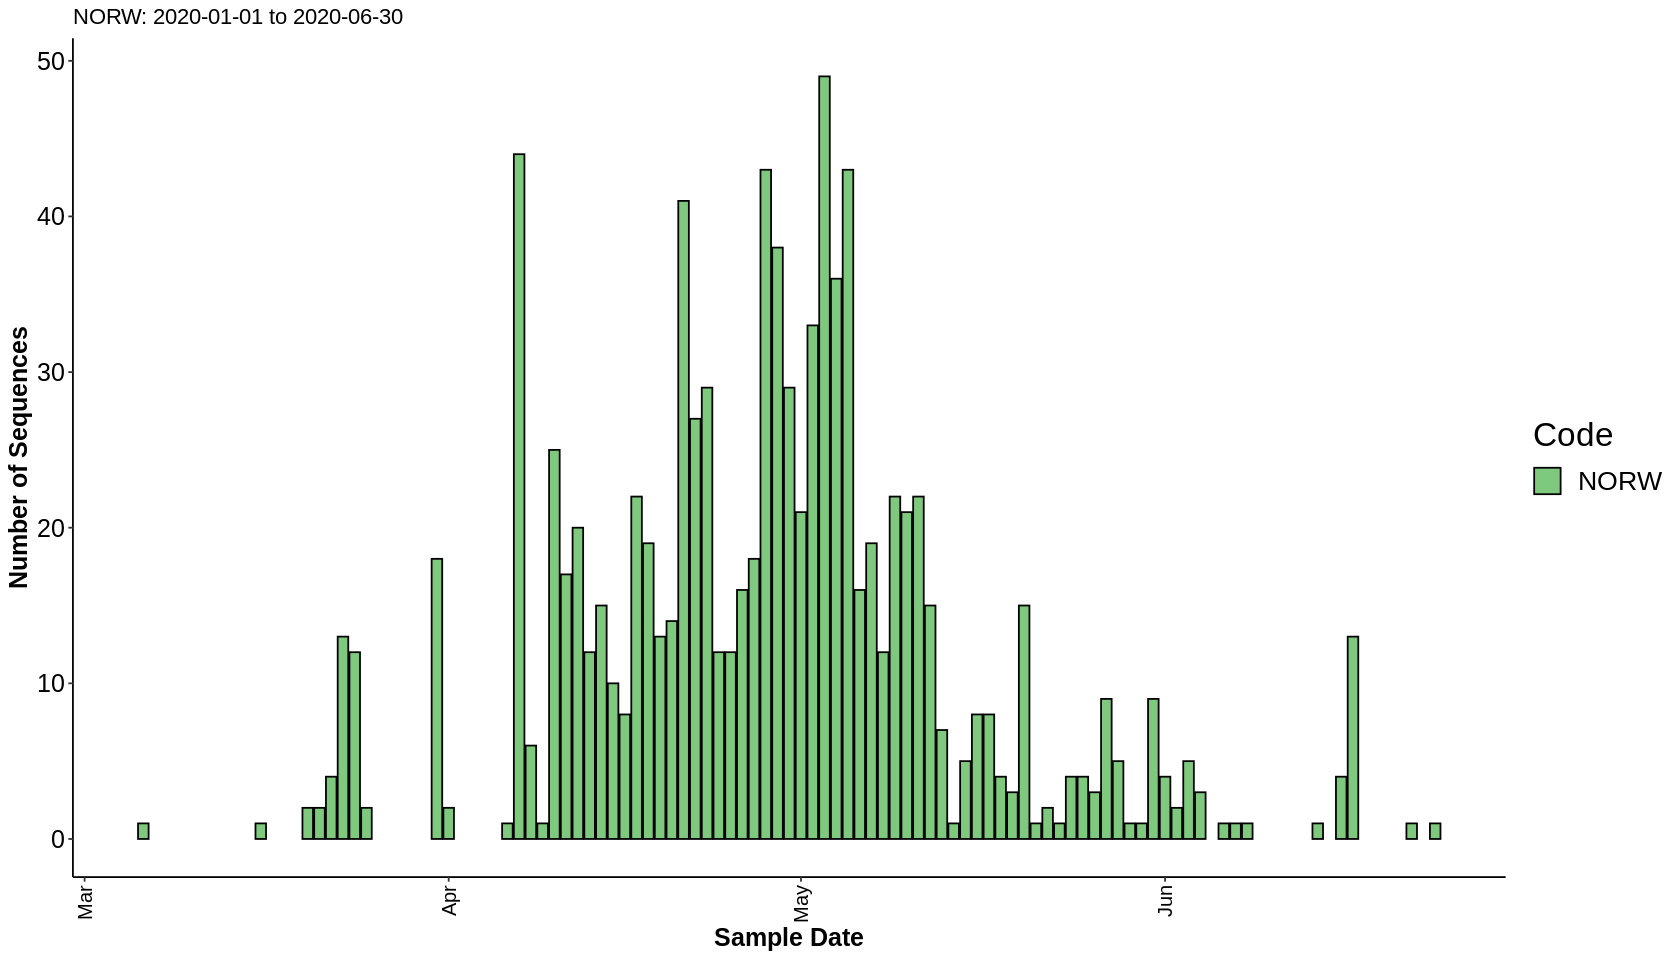

In [54]:
plot_lineage_counts("2020-01-01", "2020-06-30", "NORW")

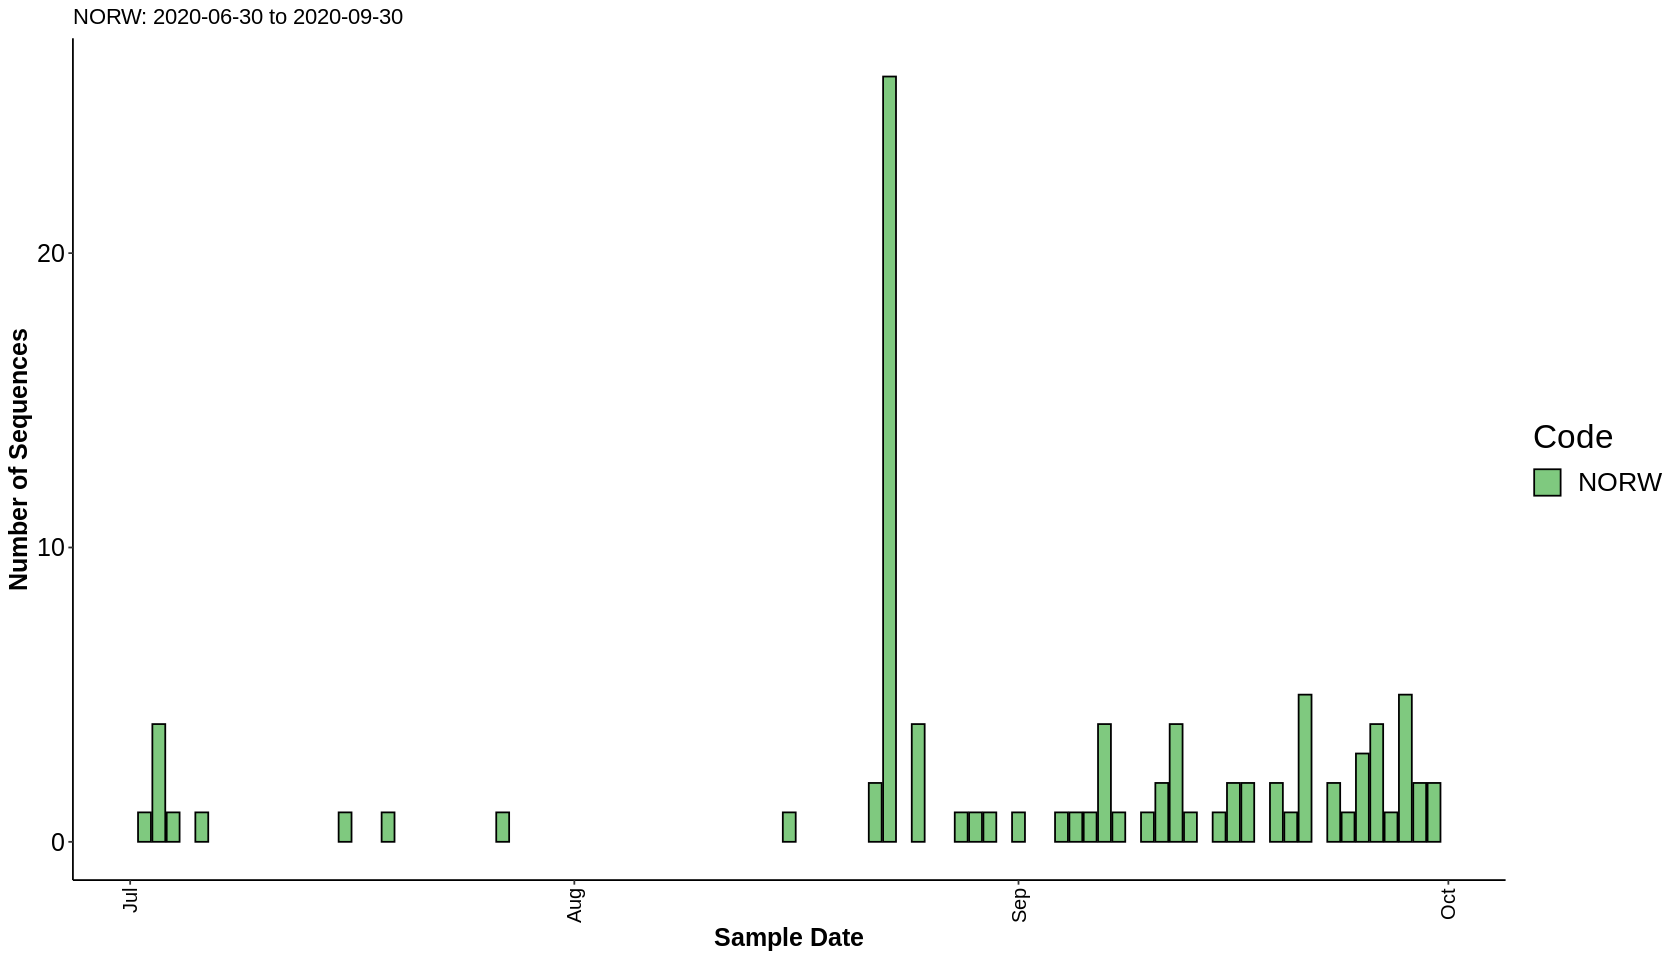

In [55]:
plot_lineage_counts("2020-06-30", "2020-09-30", "NORW")

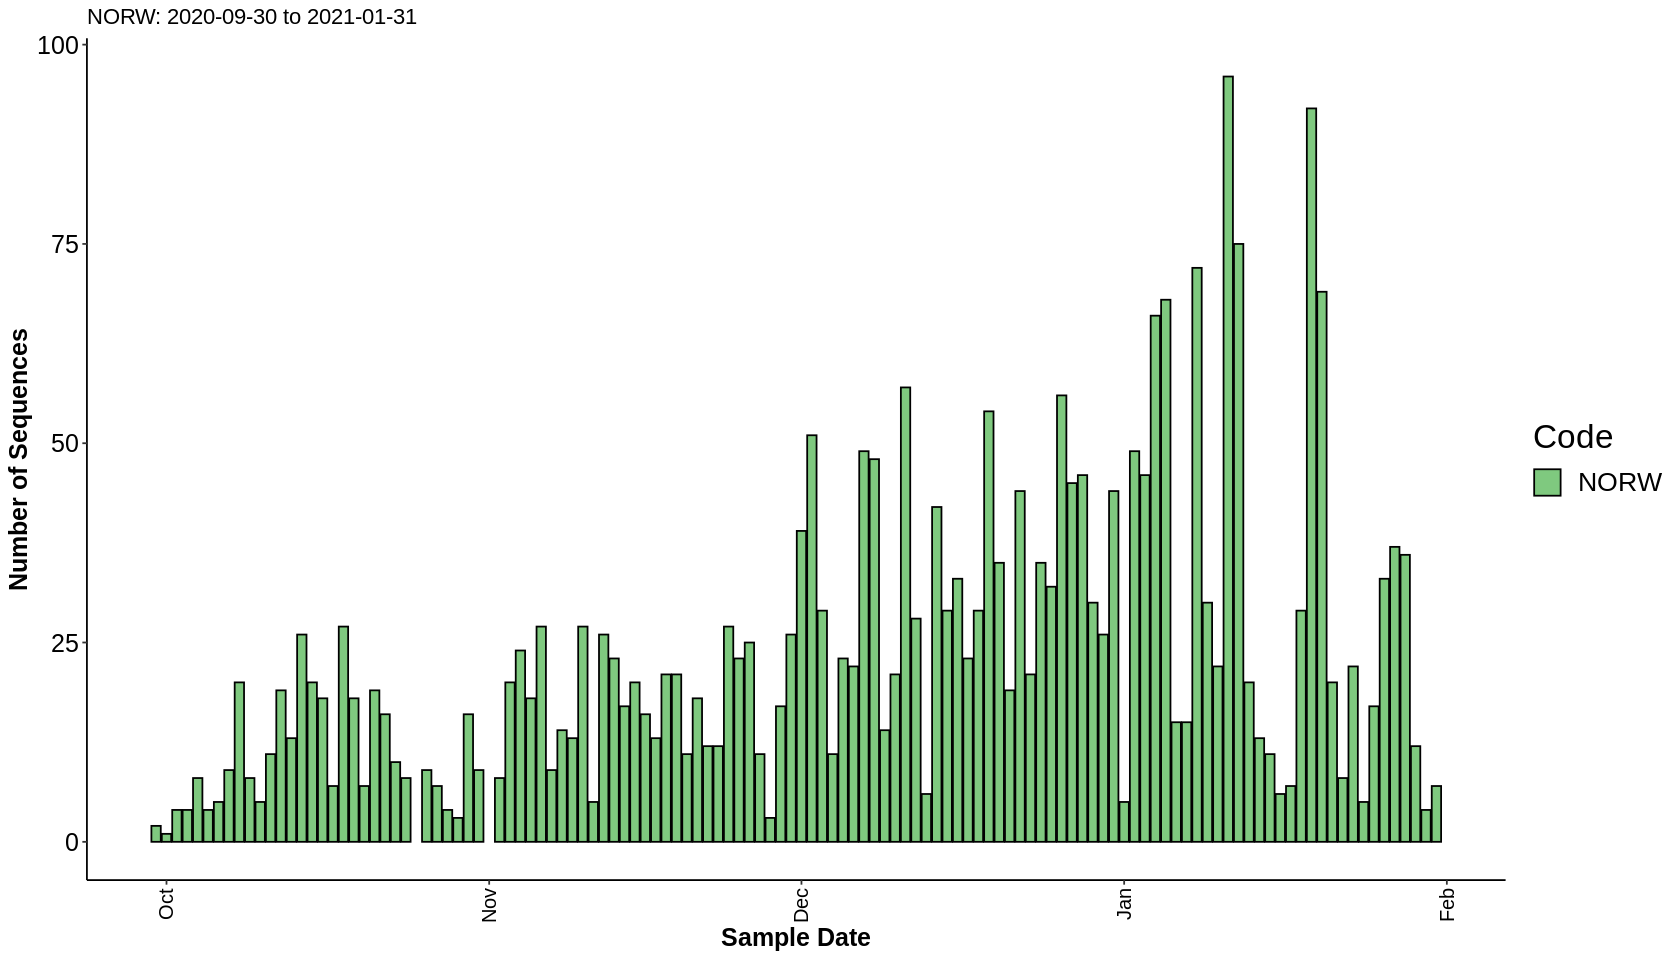

In [56]:
plot_lineage_counts("2020-09-30", "2021-01-31", "NORW")

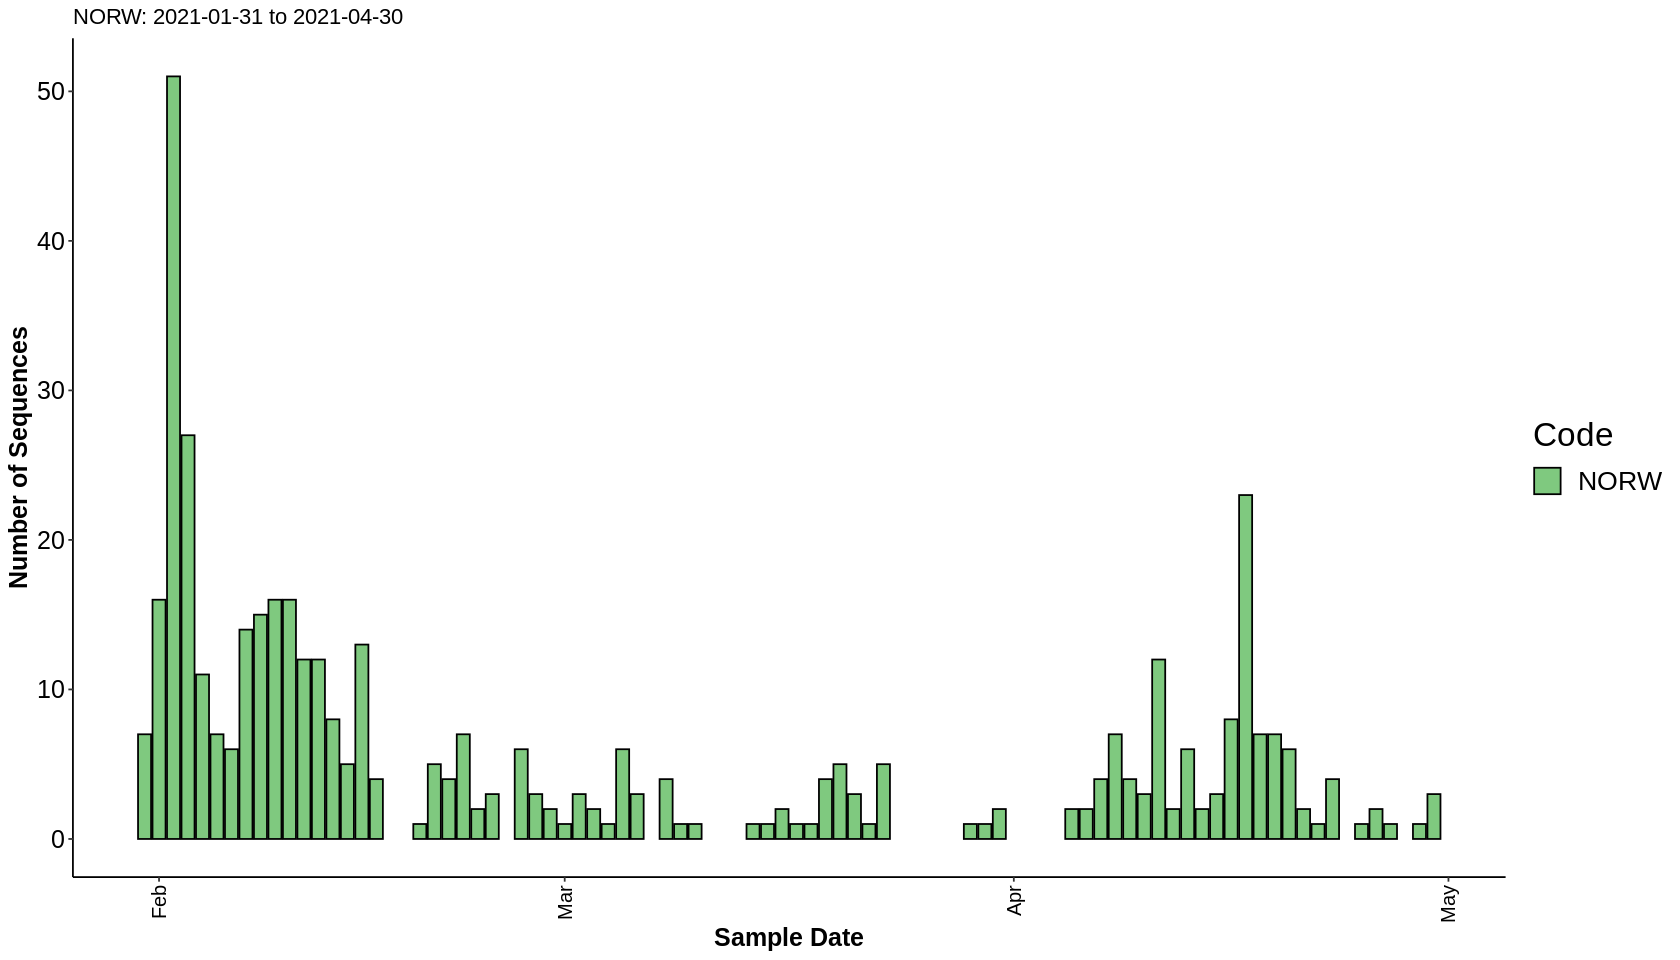

In [57]:
plot_lineage_counts("2021-01-31", "2021-04-30", "NORW")

# Worldwide Data (not subsetting for 'England/')

If I include all data from around the world, what do the counts per centre look like?

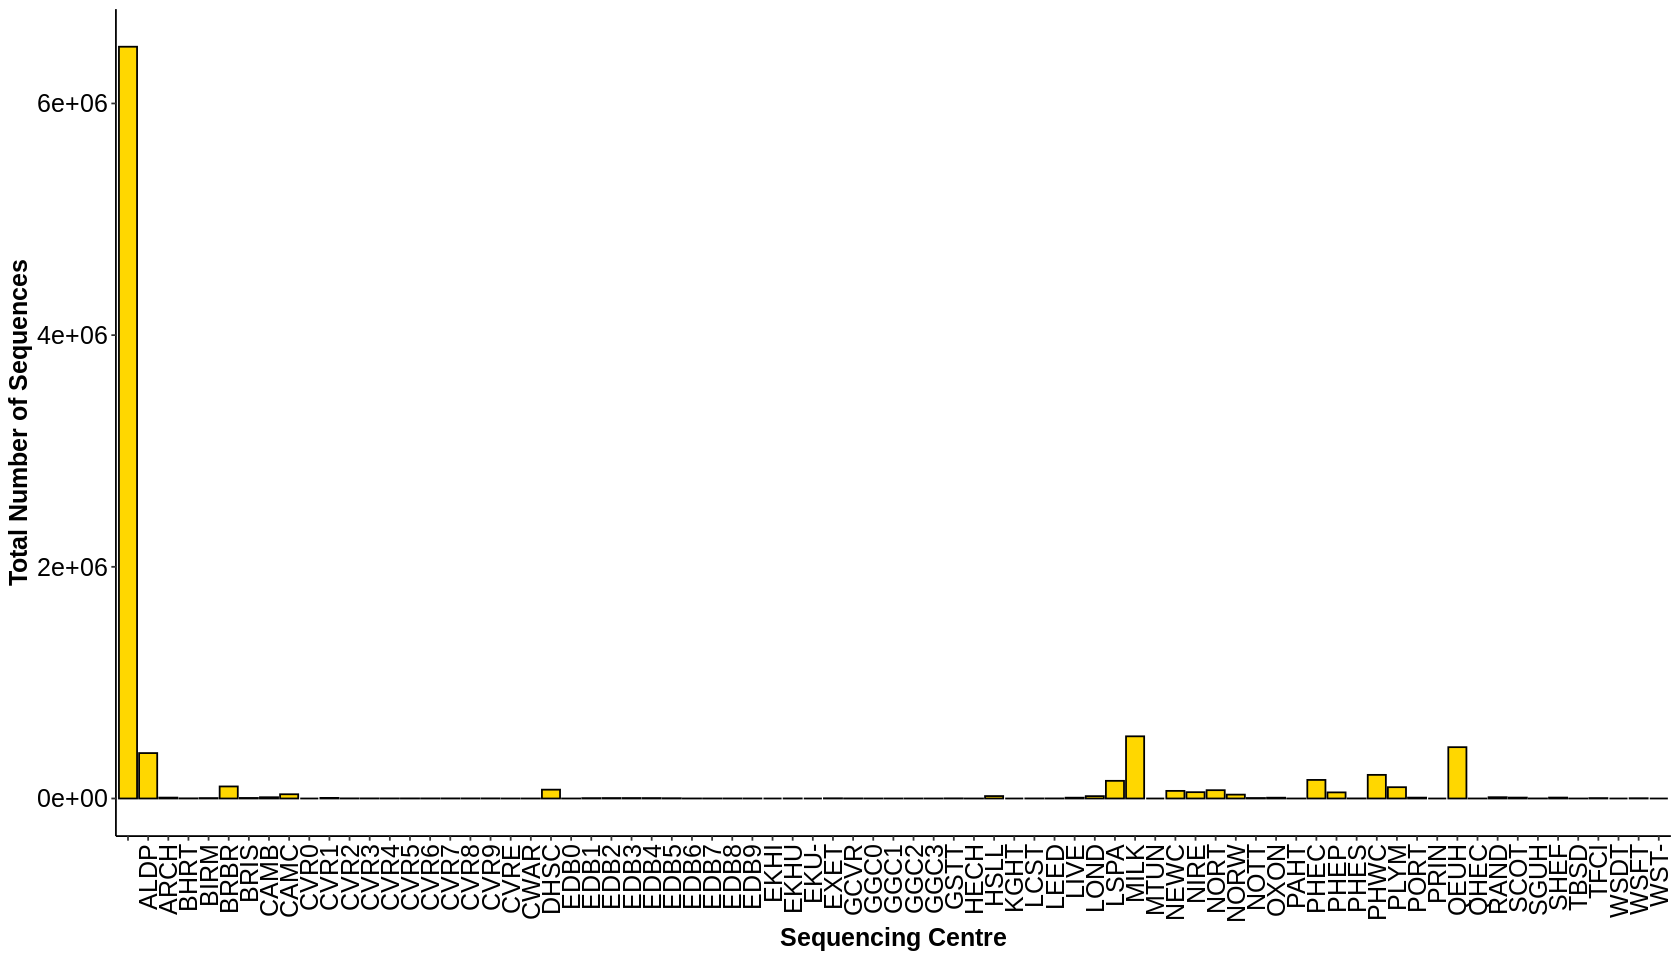

In [58]:
df$sequencing_centre = substr(df$central_sample_id,1,4)

total_counts_df <- as.data.frame(table(df$sequencing_centre))

p <- ggplot(data=total_counts_df, mapping = aes(x = Var1, y = Freq)) + ggplot2::geom_bar(stat="identity", color='black', fill='gold')  ## geom_bar()
#p <- p + scale_y_log10() 
p <- p + ggplot2::scale_fill_manual(values=getPal_centre, name="Var1")
p <- p + theme_classic() + theme(axis.text.x = element_text(color="black", size=16)) + xlab("Sequencing Centre") + ylab("Total Number of Sequences")
p <- p + theme(axis.title.x = element_text(color="black", size=15, face="bold"), 
               axis.text.x = element_text(color="black", size=15, angle = 90, vjust = 0.5, hjust=1),
               axis.title.y = element_text(color="black", size=15, face="bold"),
               axis.text.y = element_text(color="black", size=15),
               legend.text = element_text(size=16), legend.title = element_text(size=20)
              )

p